#### *Aleksandra Szczupak*

### Numerical Methods in Financial Physics 2024/25

# Machine Learning in Finances. Customer segmentation and analysis using K-Means algorithm and PCA technique.

## Machine Learning

Machine Learning is a branch of AI concerned with the development and study of statistical algorithms that can learn from data and generalize to unseen data, and thus perform tasks without explicit instructions.

ML algorithms are trained to find relationships and patterns in data. Using different data as input, these algorithms can make predictions, classify information, cluster data points, reduce dimensionality and even generate new content.

The four basic categories of Machine Learning are:
* supervised learning,
* unsupervised learning,
* semisupervised learning,
* reinforcement learning.

The choice of algorithm depends on the nature of the data.

**Supervised learning** supplies algorithms with labeled training data and defines which variables the algorithm should assess for correlations. Both the input and output of the algorithm are specified. They are used for classification, ensemble modeling or regression modeling.

**Unsupervised learning** doesn't require labeled data. Instead, these algorithms analyze unlabeled data to identify patterns and group data points into subsets. Unsupervised learning is effective for splitting the dataset into groups based on similarity using clustering algorithms, identifying unusual data points in a dataset or decreasing the number of variables in a data set using dimensionality reduction techniques.

**Semisupervised learning** provides an algorithm with only a small amount of labeled training data. From this data, the algorithm learns the dimensions of the data set, which it can then apply to new, unlabeled data.

**Reinforcement learning** involves programming an algorithm with a distinct goal and a set of rules to follow in achieving that goal. The algorithm seeks positive rewards for performing actions that move it closer to its goal and avoids punishments for performing actions that move it further from the goal.

Machine learning has extensive and diverse practical applications. In finance, ML algorithms help banks detect fraudulent transactions, deliver personalized customer experiences or improve business planning by analyzing vast amounts of data in real time at a speed and accuracy humans cannot match. In healthcare, ML assists doctors in diagnosing diseases based on medical images and informs treatment plans with predictive models of patient outcomes. And in retail, many companies use ML to personalize shopping experiences, predict inventory needs and optimize supply chains. ML also performs manual tasks that are beyond human ability to execute at scale for example, processing the huge quantities of data generated daily by digital devices. Machine learning is necessary to make sense of the ever-growing volume of data generated by modern societies.

## K-Means algorithm

K-Means is an unsupervised Machine Learning algorithm that aims to cluster data by trying to separate samples in $k$ groups of equal variance, minimizing a criterion known as the *inertia*. The K-Means algorithm divides a set of $N$ samples $X$ into $k$ disjoint clusters $C$, each described by the mean $\mu_j$ of the samples in the cluster. The means are called *cluster centers* or *centroids*.

K-Means aims to choose centroids that minimise **inertia** (within-cluster sum-of-squares) criterion: $$\sum_{i=0}^n \min_{\mu_j \in C} \Big(||x_i - \mu_j||^2\Big).$$

Inertia can be recognized as a measure of how internally coherent clusters are.

In basic terms, K-Means algorith has three steps. The first step chooses the initial centroids by choosing $k$ samples from the dataset $X$. After this initialization, K-Means consists of looping between the two other steps: assigning each sample to its nearest centroid and creating new centroids by taking the mean value of all the samples assigned to each previous centroid. The difference between the old and the new centroids are computed and the algorithm repeats these last two steps until this value is less than a threshold - until the centroids do not move significantly.

Given enough time, K-Means will always converge, however this may be to a local minimum. This is highly dependent on the initialization of the centroids. As a result, the computation is often done several times, with different initializations of the centroids. One method to help address this issue is the k-means++ initialization scheme. 

## PCA technique

Principal Component Analysis is a linear dimensionalisty reduction technique belonging to unsupervised ML category using Singular Value Decomposition of the data to project it to a lower dimensional space. The data is linearly transformed onto a new coordinate system such that the directions (principal components) capturing the largest variation in the data can be easily identified. This technique enables one to capture correlations between the features.

The first principal component PC1 is the direction in space along which the data points have the highest or most variance. It is the line that best represents the shape of the projected points. The larger the variability captured in the first component, the larger the information retained from the original dataset. The second principal component PC2 accounts for the next highest variance in the dataset and must be uncorrelated with PC1. That is, PC2 must be orthogonal, that is perpendicular, to PC1.

Before perfoming PCA the data should be *standardized* - reflect a normal distribution with a mean of zero and a standard deviation of one. Next, the covariance matrix is computed. It summarizes the covariances associated with all pair combinations of the initial variables in the dataset. Then the eigenvectors (*principal components*) and eigenvalues of the covariance matrix are calculated. The eigenvalues represent the amount of variance in each component. Ranking the eigenvectors by eigenvalues identifies the order of principal components. After selecting $n$ principal components (usually $n$ = 2), the data is projected on the principal components to obtain a n-dimensional feature subspace. This creates new data, capturing most of the information but with fewer dimensions than the original dataset.

## Steps to solve the Machine Learning clustering and dimensionality reduction problem

1. Exploratory data analysis
2. Cleaning data
3. Visualizing data
4. Normalizing or standardizing data
5. Clustering data
6. Reducing multidimensional data
7. Result analysis

### Step 0. Importing necessary libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
sns.set_theme(style='darkgrid')

### Step 1. Exploration of the data

The used dataset comes from [Kaggle](https://www.kaggle.com/) - a data science competition platform and online community for data scientists and Machine Learning practitioners under Google LLC.

This dataset - [salary data](https://www.kaggle.com/datasets/mohithsairamreddy/salary-data) - contains 6704 data points concerning age, gender, education level, job title, experience and salary of customers (6-dimensional data). The dataset was obtained from multiple sources, including surveys, job posting sites, and other publicly available sources.

In [4]:
original_data = pd.read_csv('salary_data.csv', sep=',', header=0)

In [5]:
original_data

Age  Gender    Education Level              Job Title  \
0     32.0    Male         Bachelor's      Software Engineer   
1     28.0  Female           Master's           Data Analyst   
2     45.0    Male                PhD         Senior Manager   
3     36.0  Female         Bachelor's        Sales Associate   
4     52.0    Male           Master's               Director   
...    ...     ...                ...                    ...   
6699  49.0  Female                PhD  Director of Marketing   
6700  32.0    Male        High School        Sales Associate   
6701  30.0  Female  Bachelor's Degree      Financial Manager   
6702  46.0    Male    Master's Degree      Marketing Manager   
6703  26.0  Female        High School        Sales Executive   

      Years of Experience    Salary  
0                     5.0   90000.0  
1                     3.0   65000.0  
2                    15.0  150000.0  
3                     7.0   60000.0  
4                    20.0  200000.0  
...                   ...       ...  
6699                 20.0  200000.0  
6700                  3.0   50000.0  
6701                  4.0   55000.0  
6702                 14.0  140000.0  
6703                  1.0   35000.0  

[6704 rows x 6 columns]

### Step 2. Cleaning the dataset

First, it is necessary to check, whether there is any missing data in the dataset. Data analysis often involves handling missing values, which can be a real challenge. Traditional clustering algorithms like *scikit-learn `KMeans`* don’t naturally accommodate missing data. Furthermore, instances with missing data can lead to improper results, so it is recommended to remove incomplete rows if the dataset is big enough in relation to number of missing data rows and if not all the instances have to be included.

In [6]:
original_data[original_data.isnull().any(axis=1)]

Age  Gender    Education Level            Job Title  \
172    NaN     NaN                NaN                  NaN   
260    NaN     NaN                NaN                  NaN   
2011  27.0    Male                NaN            Developer   
3136  31.0    Male    Master's Degree  Full Stack Engineer   
5247  26.0  Female  Bachelor's Degree             Social M   
6455  36.0    Male  Bachelor's Degree       Sales Director   

      Years of Experience    Salary  
172                   NaN       NaN  
260                   NaN       NaN  
2011                  7.0  100000.0  
3136                  8.0       NaN  
5247                  NaN       NaN  
6455                  6.0       NaN

In [7]:
for job in list(original_data['Job Title'].unique()):
    print(job, sep=' ')

Software Engineer
Data Analyst
Senior Manager
Sales Associate
Director
Marketing Analyst
Product Manager
Sales Manager
Marketing Coordinator
Senior Scientist
Software Developer
HR Manager
Financial Analyst
Project Manager
Customer Service Rep
Operations Manager
Marketing Manager
Senior Engineer
Data Entry Clerk
Sales Director
Business Analyst
VP of Operations
IT Support
Recruiter
Financial Manager
Social Media Specialist
Software Manager
Junior Developer
Senior Consultant
Product Designer
CEO
Accountant
Data Scientist
Marketing Specialist
Technical Writer
HR Generalist
Project Engineer
Customer Success Rep
Sales Executive
UX Designer
Operations Director
Network Engineer
Administrative Assistant
Strategy Consultant
Copywriter
Account Manager
Director of Marketing
Help Desk Analyst
Customer Service Manager
Business Intelligence Analyst
Event Coordinator
VP of Finance
Graphic Designer
UX Researcher
Social Media Manager
Director of Operations
Senior Data Scientist
Junior Accountant
Digital

In K-Means clustering, the selection of relevant variables is a critical step. This means choosing data attributes that truly represent data features. The chosen variables should be strongly indicative of the aspects being analyzed. This focused selection of variables ensures that the clustering results are meaningful and actionable, providing clear insights for strategic decision-making.

For this reason I have decided to remove columns with non-numerical values: `Gender` and `Job Title`, but to change string values from `Education Level` column to numerical degrees. The new dataset - `raw_data` - is 4-dimensional.

In [8]:
raw_data = original_data.copy(deep=True)

In [9]:
raw_data.dropna(inplace=True)

In [10]:
raw_data.drop(columns=['Gender', 'Job Title'], inplace=True)

In [11]:
raw_data

Age    Education Level  Years of Experience    Salary
0     32.0         Bachelor's                  5.0   90000.0
1     28.0           Master's                  3.0   65000.0
2     45.0                PhD                 15.0  150000.0
3     36.0         Bachelor's                  7.0   60000.0
4     52.0           Master's                 20.0  200000.0
...    ...                ...                  ...       ...
6699  49.0                PhD                 20.0  200000.0
6700  32.0        High School                  3.0   50000.0
6701  30.0  Bachelor's Degree                  4.0   55000.0
6702  46.0    Master's Degree                 14.0  140000.0
6703  26.0        High School                  1.0   35000.0

[6698 rows x 4 columns]

In [12]:
list(raw_data['Education Level'].unique())

["Bachelor's",
 "Master's",
 'PhD',
 "Bachelor's Degree",
 "Master's Degree",
 'High School',
 'phD']

In [13]:
raw_data.loc[raw_data['Education Level']=='High School', 'Education Level'] = 1
raw_data.loc[raw_data['Education Level']=="Bachelor's", 'Education Level'] = 2
raw_data.loc[raw_data['Education Level']=="Bachelor's Degree", 'Education Level'] = 2
raw_data.loc[raw_data['Education Level']=="Master's", 'Education Level'] = 3
raw_data.loc[raw_data['Education Level']=="Master's Degree", 'Education Level'] = 3
raw_data.loc[raw_data['Education Level']=='PhD', 'Education Level'] = 4
raw_data.loc[raw_data['Education Level']=='phD', 'Education Level'] = 4

In [14]:
raw_data

Age Education Level  Years of Experience    Salary
0     32.0               2                  5.0   90000.0
1     28.0               3                  3.0   65000.0
2     45.0               4                 15.0  150000.0
3     36.0               2                  7.0   60000.0
4     52.0               3                 20.0  200000.0
...    ...             ...                  ...       ...
6699  49.0               4                 20.0  200000.0
6700  32.0               1                  3.0   50000.0
6701  30.0               2                  4.0   55000.0
6702  46.0               3                 14.0  140000.0
6703  26.0               1                  1.0   35000.0

[6698 rows x 4 columns]

It is good to verify if the dataset contains any *rubbish* information that can falsify final results - outliers (for example K-Means clustering algorith is very sensitive to outliers) or simply false, artificial instances. At the beginning, I looked up the data description. Comparing 75$\%$ and maximum values one can noice that there aren't any extreme values, so I didn't have to focus on outliers. Then I checked if there are any customers that started their work before the age of sixteen. And I found two 25-year-olds with PhD degree and 12 years of experience... Not very likely? I removed them from the dataset. After that I got rid of instances with age less than 26 years old and PhD education level. I also decided to go over clients that earn monthly more than 100 000 (dollars?) having 3 or less years of experience. But in fact, such suspicious cases already exist, so I left these instances in the dataset. All in all, I removed 0.358$\%$ of the original dataset rows.

In [15]:
raw_data.describe()

Age  Years of Experience         Salary
count  6698.000000          6698.000000    6698.000000
mean     33.623022             8.095178  115329.253061
std       7.615784             6.060291   52789.792507
min      21.000000             0.000000     350.000000
25%      28.000000             3.000000   70000.000000
50%      32.000000             7.000000  115000.000000
75%      38.000000            12.000000  160000.000000
max      62.000000            34.000000  250000.000000

In [16]:
raw_data[(raw_data['Age']-raw_data['Years of Experience'])<16]

Age Education Level  Years of Experience    Salary
2376  25.0               4                 12.0  169159.0
2456  25.0               4                 12.0  169159.0

In [17]:
raw_data.drop(raw_data[(raw_data['Age']-raw_data['Years of Experience'])<16].index, inplace=True)

In [18]:
raw_data[(raw_data['Age']<26) & (raw_data['Education Level']==4)]

Age Education Level  Years of Experience    Salary
2414  23.0               4                  1.0  119836.0
2494  23.0               4                  1.0  119836.0
2562  24.0               4                  1.0  106132.0
2585  23.0               4                  0.0   52612.0
2654  23.0               4                  1.0     579.0
2808  24.0               4                  1.0  106686.0
2831  23.0               4                  0.0   52612.0
2856  23.0               4                  0.0   52779.0
2881  23.0               4                  0.0   52779.0
2927  24.0               4                  1.0  106686.0
2950  23.0               4                  0.0   52612.0
2975  23.0               4                  0.0   52779.0
3000  23.0               4                  0.0   52779.0
3046  24.0               4                  1.0  106686.0
3069  23.0               4                  0.0   52612.0
6335  24.0               4                  1.0   30000.0

In [19]:
raw_data.drop(raw_data[(raw_data['Age']<26) & (raw_data['Education Level']==4)].index, inplace=True)

In [20]:
raw_data.sort_values(by=['Salary'], ascending=False)

Age Education Level  Years of Experience    Salary
83    52.0               4                 24.0  250000.0
30    50.0               2                 25.0  250000.0
5001  45.0               2                 21.0  250000.0
4351  51.0               4                 24.0  240000.0
4381  51.0               4                 24.0  240000.0
...    ...             ...                  ...       ...
4121  28.0               1                  1.0   25000.0
4129  24.0               1                  1.0   25000.0
1890  25.0               2                  1.0     550.0
4633  31.0               2                  4.0     500.0
259   29.0               2                  1.5     350.0

[6680 rows x 4 columns]

In [21]:
raw_data[(raw_data['Salary']>100_000) & (raw_data['Years of Experience']<=3)]

Age Education Level  Years of Experience    Salary
376   28.0               2                  3.0  125000.0
377   26.0               3                  2.0  120000.0
378   27.0               2                  2.0  110000.0
385   28.0               3                  3.0  130000.0
387   27.0               4                  2.0  115000.0
...    ...             ...                  ...       ...
1104  26.0               2                  3.0  110000.0
1126  26.0               2                  3.0  110000.0
1148  26.0               2                  3.0  110000.0
1170  26.0               2                  3.0  110000.0
1192  26.0               2                  3.0  110000.0

[139 rows x 4 columns]

In [22]:
print('Removed data: {0:0.3f} %'.format((len(original_data.index)-len(raw_data.index))/len(original_data.index)*100))

Removed data: 0.358 %


In [23]:
my_raw_data = raw_data.copy(deep=True)

In [24]:
raw_data.describe()

Age  Years of Experience         Salary
count  6680.000000          6680.000000    6680.000000
mean     33.650299             8.112201  115422.008084
std       7.607778             6.056605   52778.626555
min      21.000000             0.000000     350.000000
25%      28.000000             3.000000   70000.000000
50%      32.000000             7.000000  115000.000000
75%      38.000000            12.000000  160000.000000
max      62.000000            34.000000  250000.000000

### Step 3. Visualizing data

Let’s have a look at the distribution of the features by plotting their histograms. The `Age` is a distribution with a tail. It means that the age of customers is more or less normally distributed but there are some older people. The `Years of Experience` distribution is also asymmetric - positively skewed with an outstanding value around 9 years. Regarding `Salary`, the distribution is more or less uniform. This final analysis by making a pair plot of all features confirms that the data des not contain any extreme values.

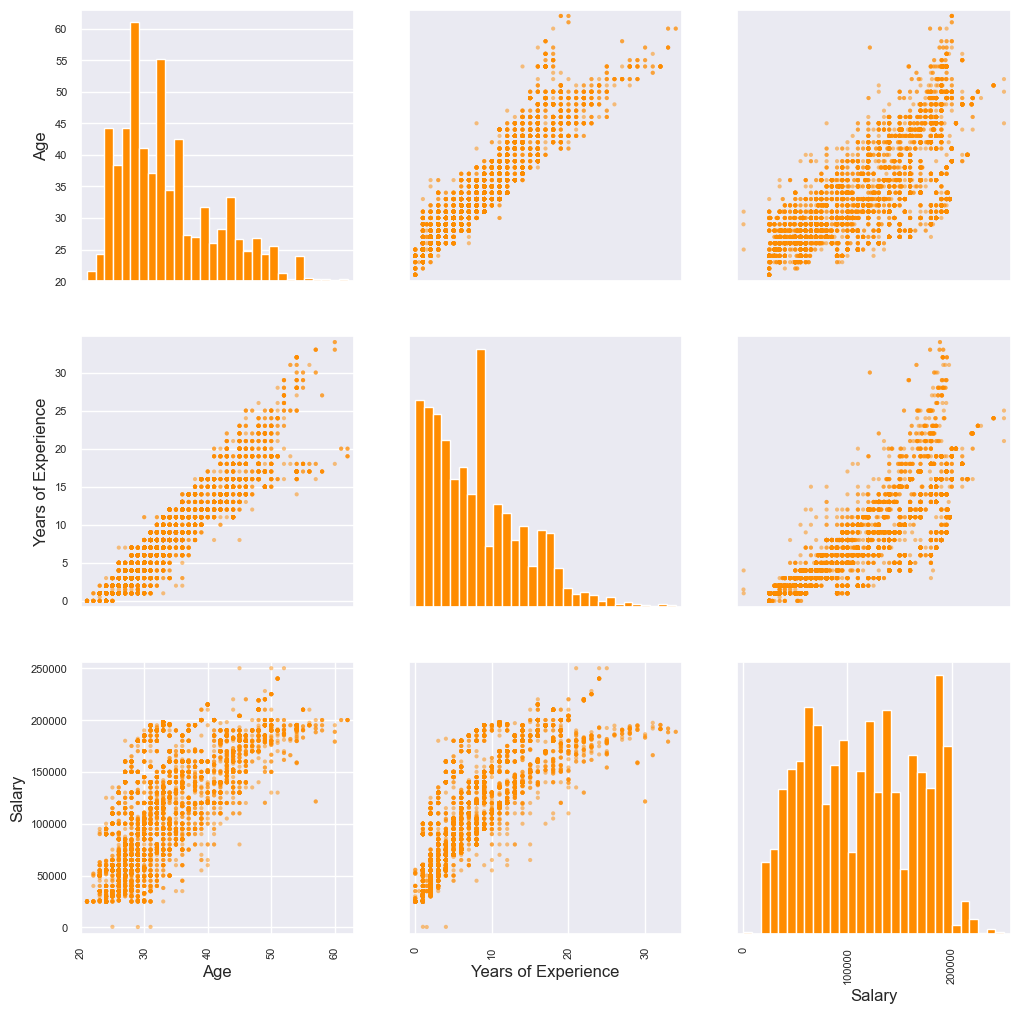

In [25]:
pd.plotting.scatter_matrix(raw_data, figsize=(12, 12), color='darkorange', hist_kwds={'bins':30, 'color':'darkorange'});
plt.subplots_adjust(hspace=0.2, wspace=0.2);

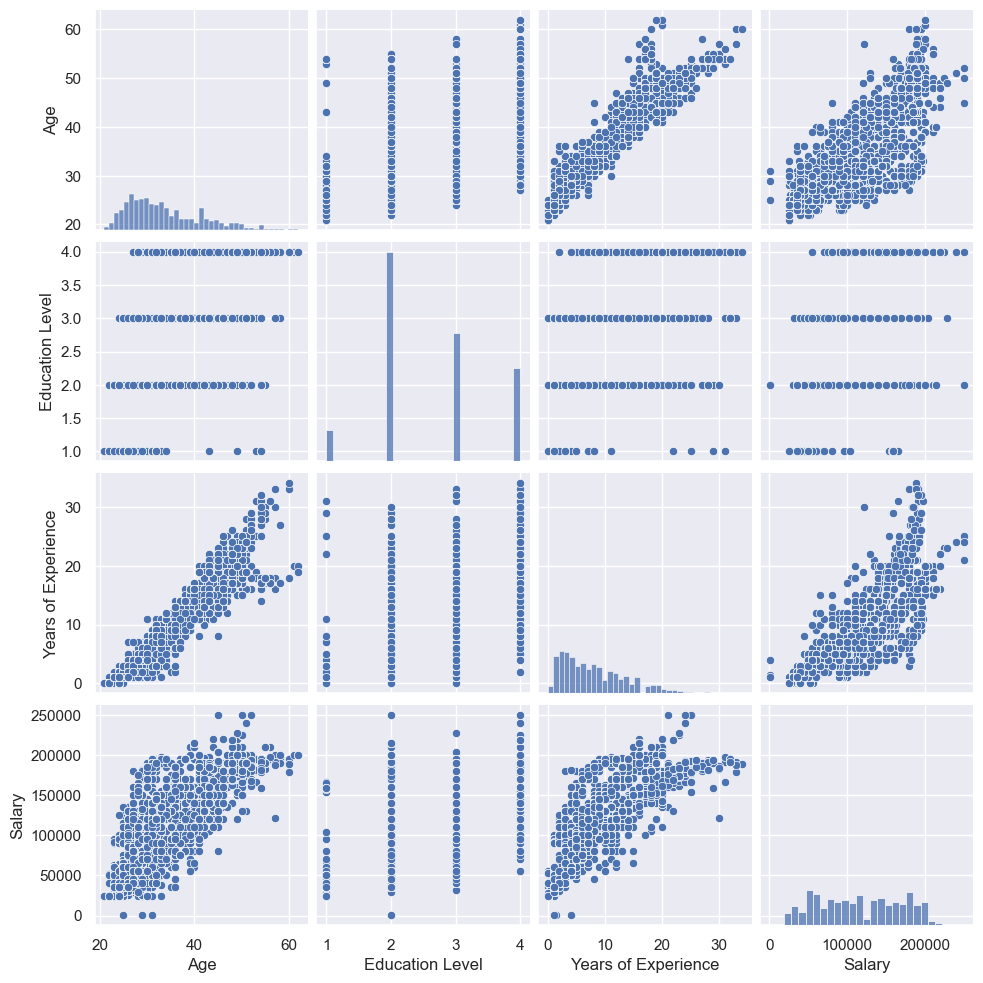

In [26]:
sns.pairplot(data=raw_data);

In [27]:
part_data = raw_data.copy(deep=True)
part_data.drop(columns=['Education Level'], inplace=True)

In [28]:
my_part_data = part_data.copy(deep=True)

### Step 4. Normalizing or standardizing data

*Normalization* and *standardization* both belong to the idea or category of feature scaling. Feature scaling is an important step in preparing data for Machine Learning models. It involves transforming the values of features in a dataset to a similar scale, ensuring that all features contribute equally to the model’s learning process. 

Feature scaling addresses these issues by adjusting the range of the data without distorting differences in the values. There are several scaling techniques, with normalization and standardization being the most commonly used.

**Normalization** is a technique used to modify and adjust the values of the features measured on different scales to a common scale. Normalization is particularly useful when the distribution of the data is unknown or does not follow a Gaussian distribution.

**Standardization**, which is also called *z-score scaling* transforms data to have a mean of 0 and a standard deviation of 1. This process adjusts the feature values by subtracting the mean (centering data) and dividing by the standard deviation (scaling data). Standardization is most appropriate for example in gradient-based algorithms or dimensionality reduction.

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
%%time
scaler = StandardScaler()
stand_data = scaler.fit_transform(raw_data)
stand_data = pd.DataFrame(data=stand_data, index=raw_data.index, columns=raw_data.columns)

CPU times: total: 0 ns
Wall time: 3.89 ms


In [31]:
stand_data

Age  Education Level  Years of Experience    Salary
0    -0.216939        -0.699490            -0.513891 -0.481708
1    -0.742756         0.436289            -0.844134 -0.955421
2     1.491966         1.572068             1.137323  0.655200
3     0.308878        -0.699490            -0.183648 -1.050163
4     2.412146         0.436289             1.962930  1.602625
...        ...              ...                  ...       ...
6699  2.017784         1.572068             1.962930  1.602625
6700 -0.216939        -1.835269            -0.844134 -1.239648
6701 -0.479847        -0.699490            -0.679012 -1.144905
6702  1.623421         0.436289             0.972201  0.465716
6703 -1.005664        -1.835269            -1.174376 -1.523875

[6680 rows x 4 columns]

In [32]:
scaler.mean_

array([3.36502994e+01, 2.61586826e+00, 8.11220060e+00, 1.15422008e+05])

In [33]:
scaler.var_

array([5.78696257e+01, 7.75197300e-01, 3.66769694e+01, 2.78516642e+09])

The summarizing table `stand_data.describe()` (below) shows that the standardized data has 0 mean and 1 standard deviation within the numerical error.

In [34]:
stand_data.describe()

Age  Education Level  Years of Experience        Salary
count  6.680000e+03     6.680000e+03         6.680000e+03  6.680000e+03
mean  -3.063418e-16     2.552848e-17        -1.021139e-16  3.403798e-17
std    1.000075e+00     1.000075e+00         1.000075e+00  1.000075e+00
min   -1.662936e+00    -1.835269e+00        -1.339498e+00 -2.180440e+00
25%   -7.427559e-01    -6.994903e-01        -8.441336e-01 -8.606781e-01
50%   -2.169389e-01    -6.994903e-01        -1.836481e-01 -7.996413e-03
75%    5.717867e-01     4.362888e-01         6.419588e-01  8.446853e-01
max    3.726689e+00     1.572068e+00         4.274629e+00  2.550049e+00

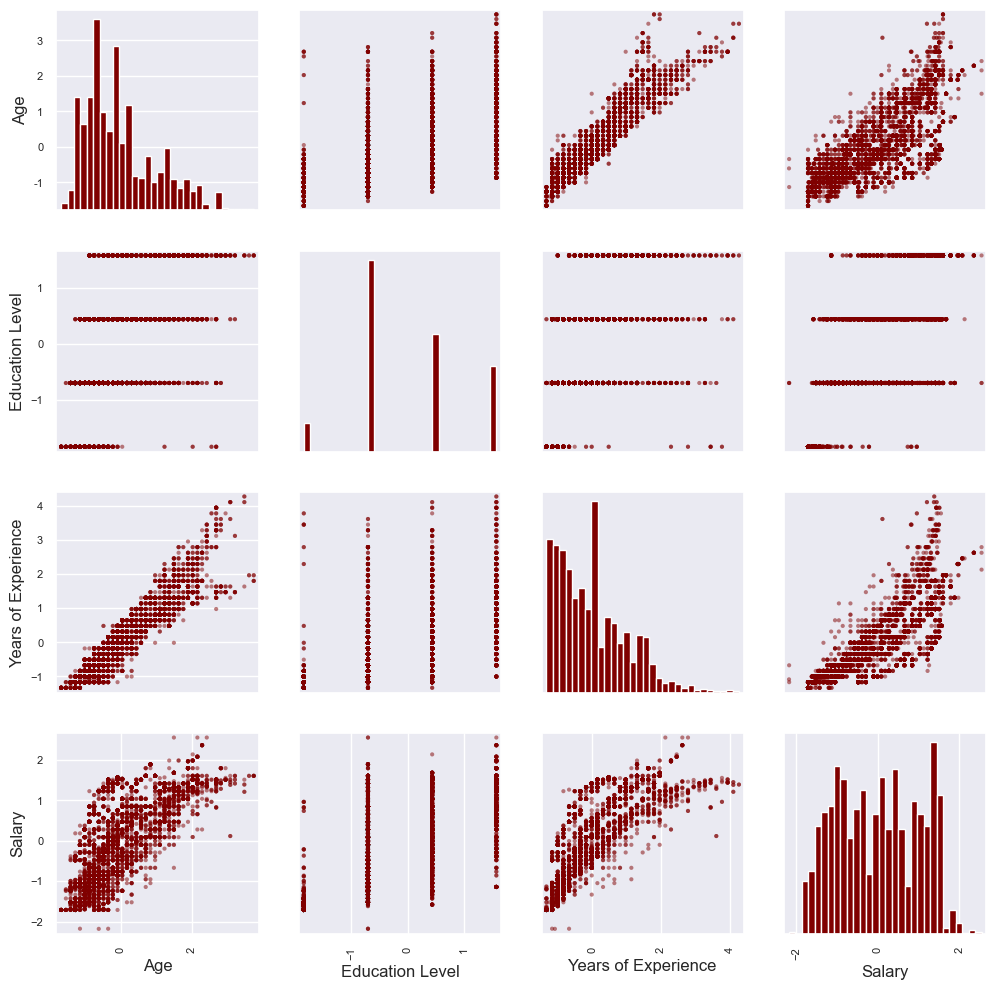

In [35]:
pd.plotting.scatter_matrix(stand_data, figsize=(12, 12), color='maroon', hist_kwds={'bins':30, 'color':'maroon'});
plt.subplots_adjust(hspace=0.2, wspace=0.2);

### Step 5. Clustering data

Cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar to each other than to those in other groups (clusters).

The appropriate clustering algorithm and parameter settings depend on the individual data set and intended use of the results. Thereby it is vital to make an [overview of clustering methods](https://scikit-learn.org/stable/modules/clustering.html#) to choose the suitable model for the particular dataset.

Algorithm used in this project - **K-Means** is a general-purpose clustering algorithm, good for even cluster sizes, [flat geometry](https://datascience.stackexchange.com/questions/52260/terminology-flat-geometry-in-the-context-of-clustering) and not to many clusters.

In [36]:
from sklearn.cluster import KMeans

scikit-learn `KMeans` parameters:
* `n_clusters` : *int, default=8*. The number of clusters to form as well as the number of centroids to generate.
* `init` : *{'k-means++', 'random'}, default='k-means++'*. Method for initialization. `k-means++` selects initial cluster centroids using sampling based on an empirical probability distribution of the points’ contribution to the overall inertia, while `random` chooses `n_clusters` observations (rows) at random from data for the initial centroids.
* `n_init` : *'auto'* or *int, default='auto*. Number of times the K-Means algorithm is run with different centroid seeds.
* `max_iter` : *int, default=300*. Maximum number of iterations of the K-Means algorithm for a single run.
* `tol` : *float, default=1e-4*. Relative tolerance with regards to Frobenius norm of the difference in the cluster centers of two consecutive iterations to declare convergence.
* `random_state` : *int, RandomState instance or None, default=None*. Determines random number generation for centroid initialization.
* `copy_x` : *bool, default=True*. When pre-computing distances it is more numerically accurate to center the data first. If `copy_x` is `True` (default), then the original data is not modified.
* `algorithm` : *{'lloyd', 'elkan'}, default='lloyd'*. K-Means algorithm to use. The classical EM-style algorithm is `lloyd`. The `elkan` variation can be more efficient on some datasets with well-defined clusters, by using the triangle inequality.

In [37]:
# it doesn't really change too much in results if I take default max_iter = 300, but significantly prolongs the time
max_iter = 10

In [38]:
%%time
inertias = []
for ncl in range(2, 21):
    nkm = KMeans(n_clusters=ncl, init='random', n_init=1, max_iter=max_iter, random_state=42)
    nkm.fit(stand_data)
    inertias.append(nkm.inertia_)

CPU times: total: 3.09 s
Wall time: 639 ms


The *elbow method* is a heuristic method used in determining the number of clusters in a data set. The method consists of plotting inertia as a function of the number of clusters and picking the elbow of the curve - the value of $k$ (number of K-Means clusters) at which inertia starts to decrease at a slower rate - as the number of clusters to use.

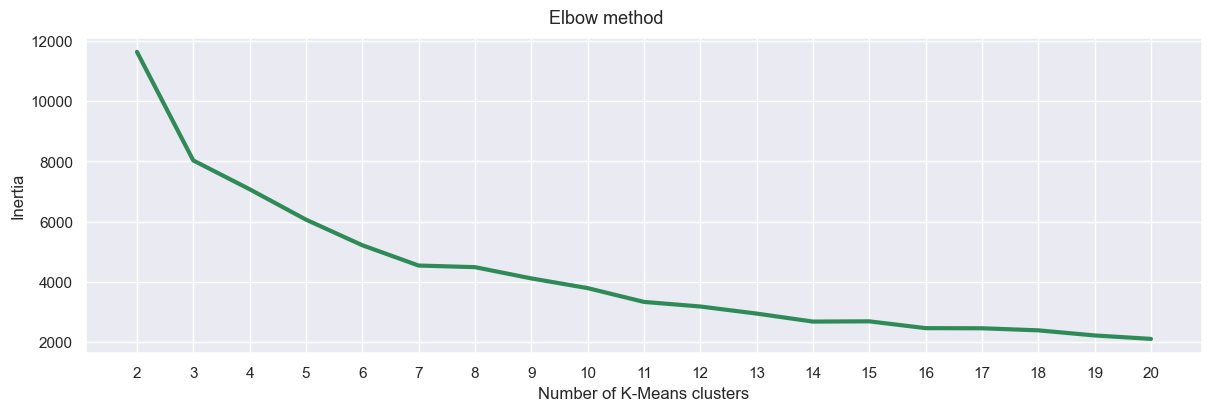

In [39]:
fig, ax = plt.subplots(figsize=(12, 4), constrained_layout=True)
fig.suptitle('Elbow method', fontsize=13)
xclusters = range(2, 21, 1)
ax.plot(xclusters, inertias, linewidth=3, color='seagreen')
ax.set(xlabel='Number of K-Means clusters', ylabel='Inertia')
ax.set_xticks(np.arange(2, 21, 1.0))
ax.grid(True)

In many practical applications, the choice of an *elbow* is highly ambiguous as the plot does not contain a sharp elbow. But in this case it is clear (*Elbow method for default `KMeans` parameters*) that the number of clusters is `nclusters` = 3.

In [40]:
%%time
# Elbow method for default KMeans parameters
dinertias = []
for ncl in range(2, 21):
    nkm = KMeans(n_clusters=ncl, random_state=42)
    nkm.fit(stand_data)
    dinertias.append(nkm.inertia_)

CPU times: total: 1min 14s
Wall time: 6.95 s


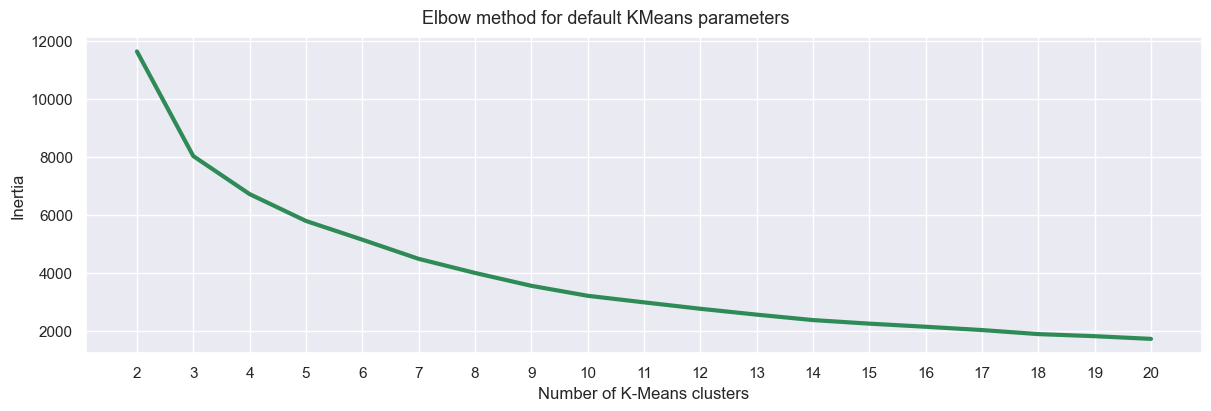

In [41]:
fig, ax = plt.subplots(figsize=(12, 4), constrained_layout=True)
fig.suptitle('Elbow method for default KMeans parameters', fontsize=13)
xclusters = range(2, 21, 1)
ax.plot(xclusters, dinertias, linewidth=3, color='seagreen')
ax.set(xlabel='Number of K-Means clusters', ylabel='Inertia')
ax.set_xticks(np.arange(2, 21, 1.0))
ax.grid(True)

In [42]:
nclusters = 3

In [43]:
from mycolorpy import colorlist as mcp

In [44]:
cmap = 'viridis'
colors = mcp.gen_color(cmap=cmap, n=nclusters)

In [45]:
%%time
kmeans = KMeans(n_clusters=nclusters, init='random', n_init=1, max_iter=max_iter, random_state=42)
# default KMeans parameters
#kmeans = KMeans(n_clusters=nclusters, random_state=42)
kmeans.fit(stand_data)
cluster_labels = kmeans.labels_
centroids = kmeans.cluster_centers_

CPU times: total: 31.2 ms
Wall time: 29.6 ms


In [46]:
kmeans.inertia_

8034.41481617498

In [47]:
raw_data = raw_data.assign(Cluster=cluster_labels)
stand_data = stand_data.assign(Cluster=cluster_labels)

In [48]:
raw_data

Age Education Level  Years of Experience    Salary  Cluster
0     32.0               2                  5.0   90000.0        2
1     28.0               3                  3.0   65000.0        2
2     45.0               4                 15.0  150000.0        0
3     36.0               2                  7.0   60000.0        2
4     52.0               3                 20.0  200000.0        0
...    ...             ...                  ...       ...      ...
6699  49.0               4                 20.0  200000.0        0
6700  32.0               1                  3.0   50000.0        2
6701  30.0               2                  4.0   55000.0        2
6702  46.0               3                 14.0  140000.0        0
6703  26.0               1                  1.0   35000.0        2

[6680 rows x 5 columns]

In [49]:
labels = pd.Series(raw_data['Cluster'])
data_clusters = [list(labels[labels==i].index) for i in range(nclusters)]

In [50]:
for i in range(nclusters):
    print('Cluster {}: size = {}'.format(i, len(data_clusters[i])))    

Cluster 0: size = 1561
Cluster 1: size = 2460
Cluster 2: size = 2659


In [51]:
mean_data = pd.DataFrame(raw_data.groupby(['Cluster']).mean())

Looking at the `mean_data` table summarizing obtained clusters, it is indisputable that the clusters are separable which means that the taken number of clusters `nclusters` = 3 was optimal. It is also evident on the pair plot of clustered data. Each cluster describes a distinct group of customers.

In [52]:
mean_data

Age Education Level  Years of Experience         Salary
Cluster                                                               
0        44.839206        3.497117            16.905830  175771.882767
1        33.177642        2.799593             8.238618  133871.861789
2        27.518992        1.928545             2.832832   62923.777736

In [53]:
mean_stand_data = pd.DataFrame(stand_data.groupby(['Cluster']).mean())

In [54]:
mean_stand_data

Age  Education Level  Years of Experience    Salary
Cluster                                                          
0        1.470829         1.000904             1.452016  1.143539
1       -0.062133         0.208671             0.020874  0.349597
2       -0.805986        -0.780648            -0.871737 -0.994762

In [55]:
centroids

array([[ 1.43479822,  1.01090103,  1.43094055,  1.13854915],
       [-0.06735487,  0.18378953,  0.00703345,  0.33480365],
       [-0.80848305, -0.78190511, -0.87443077, -0.99796276]])

In [56]:
abs(mean_stand_data.to_numpy(dtype='float64')-centroids)

array([[0.03603117, 0.00999687, 0.02107551, 0.00498936],
       [0.00522208, 0.02488175, 0.01384075, 0.01479307],
       [0.00249659, 0.00125722, 0.00269419, 0.00320098]])

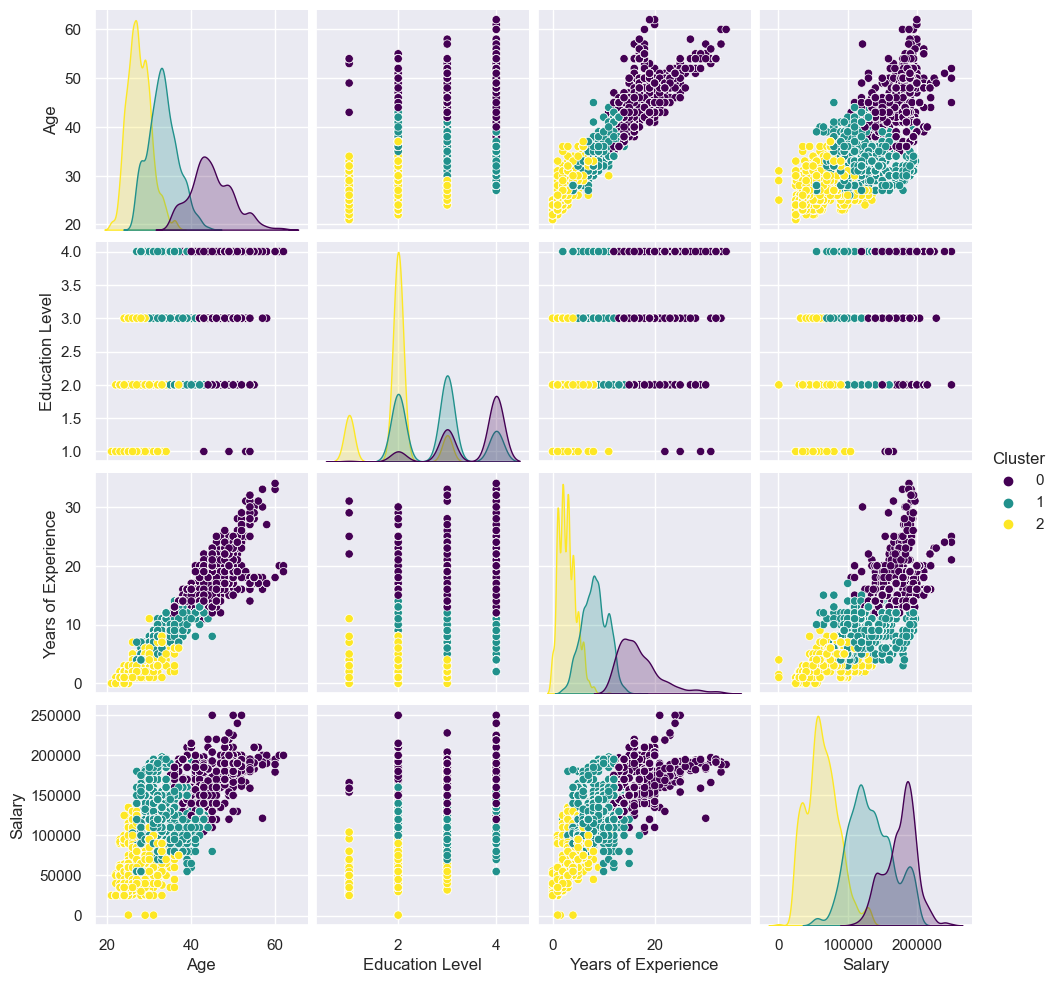

In [57]:
sns.pairplot(data=raw_data, hue='Cluster', palette='viridis');

Cluster sizes and mean results for default `KMeans` parameters:

| Cluster | size | Age | Education Level | Years of Experience | Salary |
| :- | :-: | :-: | :-: | :-: | :-: |
| 0 | 2675 | 27.542804 | 1.931589 | 2.848411 | 63093.311028 |
| 1 | 2456 | 33.226384 | 2.802932 | 8.279723 | 134143.807003 |
| 2 | 1549 | 44.869593 | 3.500968 | 16.936733 | 176105.369270

Pair plot for clustering with default `KMeans` parameters:

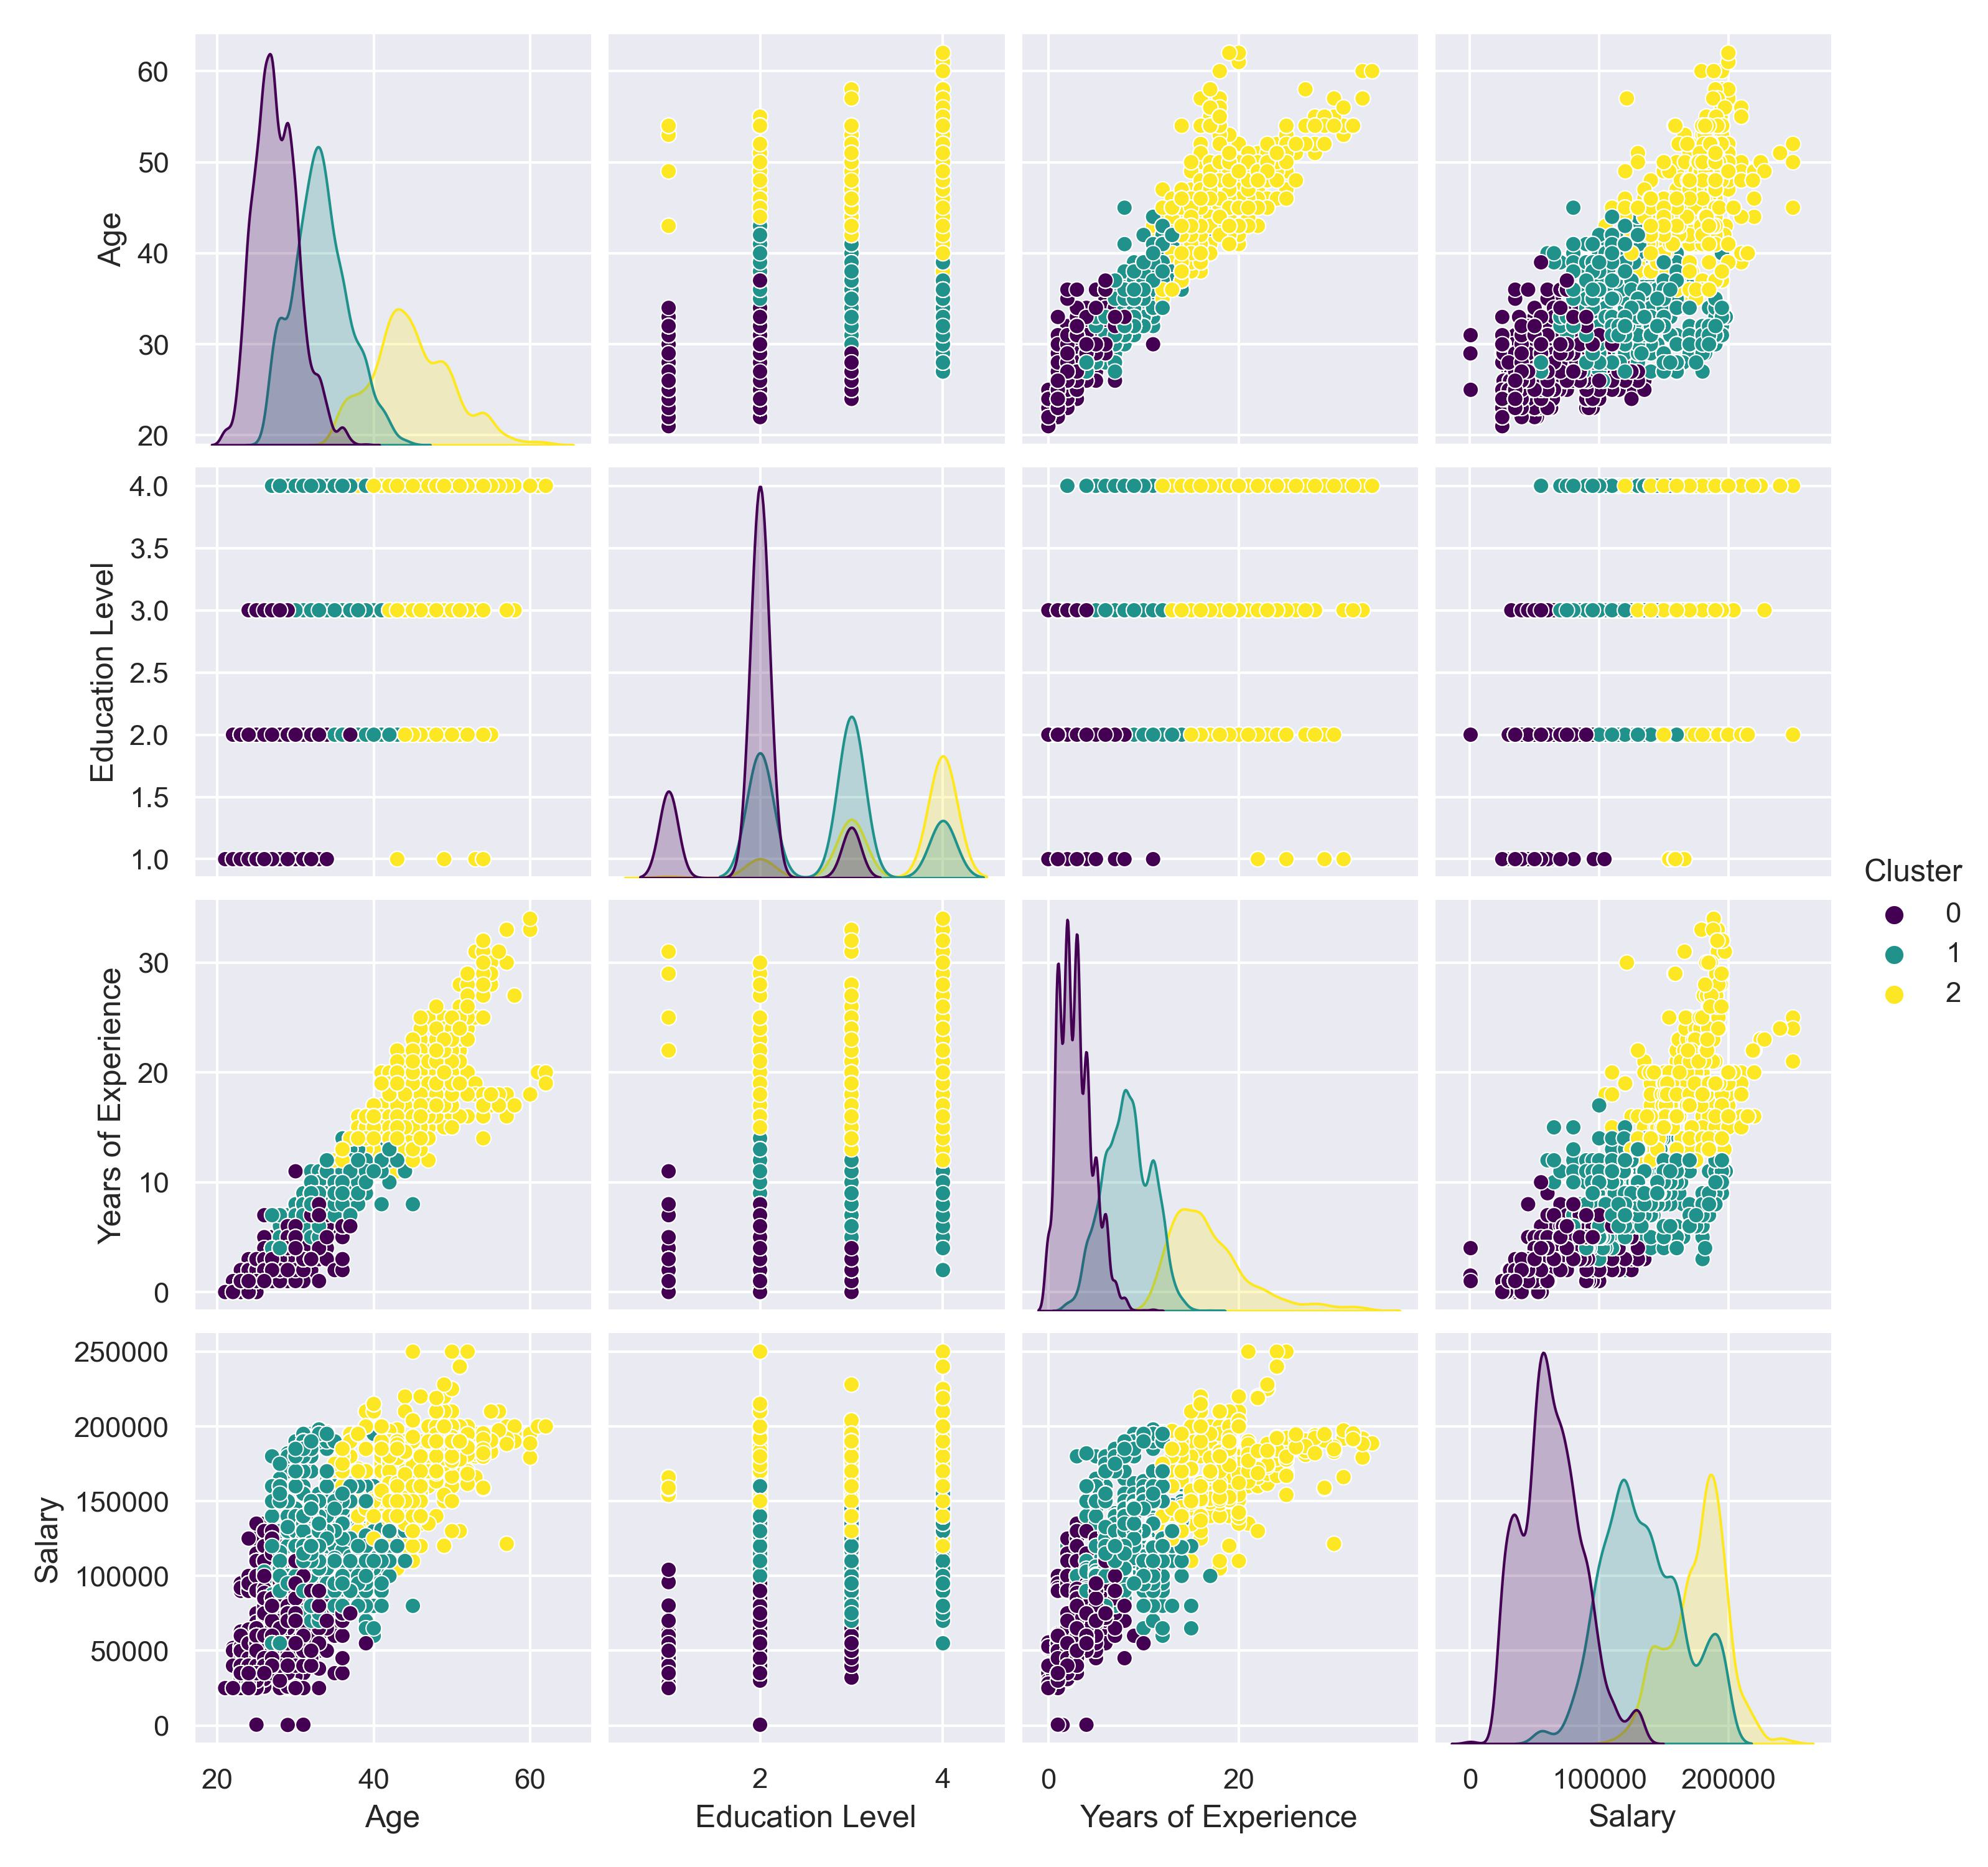

### Step 6. Reducing the multidimensional data

Projecting data to a lower-dimensional space enables us to graphically represent obtained clusters. Dimensionality reduction is important to visualization and better understanding multidimensional data. PCA is one of the methods used to find relationships between features (dimensions).

Dimension reduction and cluster analysis have a long history in multivariate data analysis. Dimension reduction methods typically concern themselves with a reduction in the variable space through either selection of variables or the construction of new variables as combinations of the original ones. Cluster analysis aims to detect groups of similar observations thus reducing the row space. Although these methods typically consider different objective functions, the ultimate goals, e.g., detecting and summarizing relevant properties and relationships in the data, are typically similar if not identical. Consequently, dimension reduction and cluster analysis are frequently combined.

One way to combine dimension reduction and cluster analysis is to perform the analyses sequentially. In particular, a common procedure is to first perform dimension reduction and then apply cluster analysis to the reduced data. However it was noticed that clustering after performing PCA can give inaccurate clusters - such sequential analyses may not be optimal due to the differences between the objective functions corresponding to the dimension reduction and cluster analysis parts. Thereby I have decided to perform clustering before dimensionality reduction to get a complete descripiton of the clusters.

In [58]:
from sklearn.decomposition import PCA

In [59]:
%%time
pca = PCA(n_components=2)
pca_data = pca.fit_transform(stand_data[stand_data.columns[:-1]]);

CPU times: total: 109 ms
Wall time: 8.76 ms


In [60]:
pca.components_

array([[ 0.51843721,  0.44120125,  0.53308036,  0.50238397],
       [ 0.38014824, -0.85448914,  0.35361492, -0.01709148]])

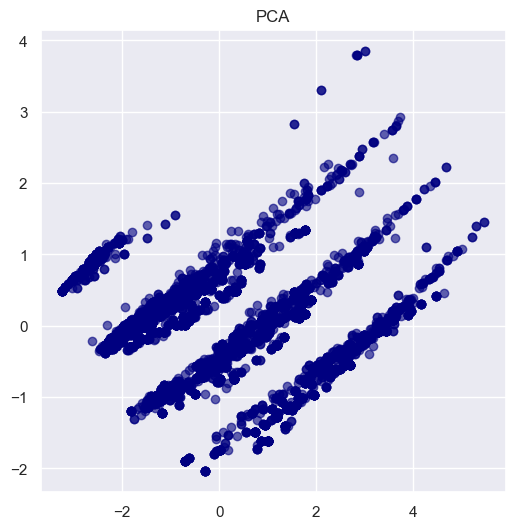

In [61]:
fig = plt.figure(figsize=(6, 6))
plt.title('PCA')
plt.scatter(pca_data.T[0], pca_data.T[1], c='navy', alpha=0.6)
plt.show();

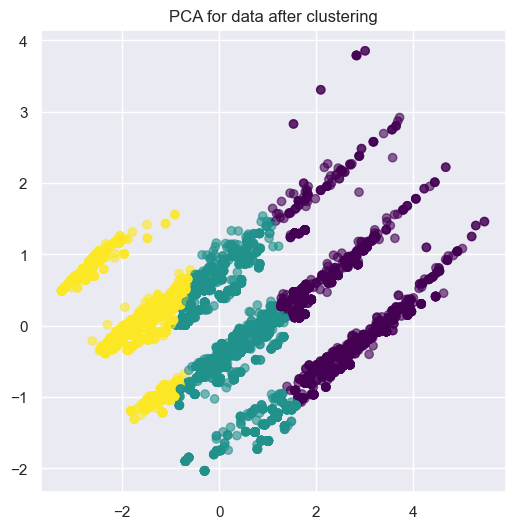

In [62]:
fig = plt.figure(figsize=(6, 6))
plt.title('PCA for data after clustering')
plt.scatter(pca_data.T[0], pca_data.T[1], c=raw_data['Cluster'], cmap=cmap, alpha=0.6)
plt.show();

### 7. Analyzing the results

K-Means algorithm grouped 6680 clients into 3 separate clusters basing on their age, education level, years of experience and salary.

K-Means clustering is a powerful tool for financial market analysis. Its ability to unveil hidden patterns in data is invaluable in this data-driven era, especially in the banking sector where insights translate directly into competitive advantage and enhanced customer service.

# Applications of K-Means clustering in Banking
* Customer segmentation for personalized marketing - by analyzing transaction histories, types of accounts, and customer demographics, banks can group customers into distinct segments which allows for highly personalized marketing strategies
* Credit scorig for loan approval - clustering enables to categorize customers into different risk profiles by examining their credit history which provides an understanding of each applicant’s financial stability, enabling banks to make more informed and accurate decisions regarding loan approvals
* Optimizing ATMs placements - analyzing transaction patterns and customer location data banks determine the most strategic locations for their ATMs
* Type classification of financial risk - through analyzing patterns in financial data, K-Means helps in grouping risks into clusters, but the interpretation of these clusters into specific risk categories requires further analysis, often involving additional supervised learning methods or expert insights
* Stock market segmentation - to find similarities amongst companies that might otherwise not be detected, with the aim of helping investors to diversify their investment portfolios
* And many other applications...

### Test: Clustering with 7 clusters

Looking at the elbow method for chosen parameters (`init='random'`, `n_init=1`, `max_iter=10`) it was ambiguous whether to choose 3 or 7 clusters. That is why I decided to check clustering results for 7 clusters.

In [63]:
check_nclusters = 7

In [64]:
check_colors = mcp.gen_color(cmap=cmap, n=check_nclusters)

In [65]:
check_kmeans = KMeans(n_clusters=check_nclusters, init='random', n_init=1, max_iter=max_iter, random_state=42)
check_kmeans.fit(stand_data[stand_data.columns[:-1]])
check_cluster_labels = check_kmeans.labels_
check_centroids = check_kmeans.cluster_centers_

In [66]:
check_raw_data = raw_data.copy(deep=True)
check_raw_data.drop(columns=['Cluster'], inplace=True)
check_raw_data = raw_data.assign(Cluster=check_cluster_labels)

In [67]:
check_labels = pd.Series(check_raw_data['Cluster'])
check_data_clusters = [list(check_labels[check_labels==i].index) for i in range(check_nclusters)]

In [68]:
for i in range(check_nclusters):
    print('Cluster {}: size = {}'.format(i, len(check_data_clusters[i]))) 

Cluster 0: size = 795
Cluster 1: size = 2089
Cluster 2: size = 433
Cluster 3: size = 295
Cluster 4: size = 1348
Cluster 5: size = 948
Cluster 6: size = 772


In [69]:
check_mean_data = pd.DataFrame(check_raw_data.groupby(['Cluster']).mean())

Obtained clusters are not separable what is shown in the `check_mean_data` table and on the pair plot. For example, clusters 4 and 5 are similiar in `Age`, `Years of Experience` and `Salary` features.

In [70]:
check_mean_data

Age Education Level  Years of Experience         Salary
Cluster                                                               
0        45.483019        3.998742            15.977358  178424.490566
1        27.601723        2.132121             2.976783   66246.690761
2        26.263279        1.002309             1.235566   32863.023095
3        49.823729        2.989831            23.433898  184351.962712
4        32.739614         3.35905             8.045994  129064.894659
5        31.905063        1.993671             7.064346  131851.032700
6        39.528497        2.729275            13.313472  159578.279793

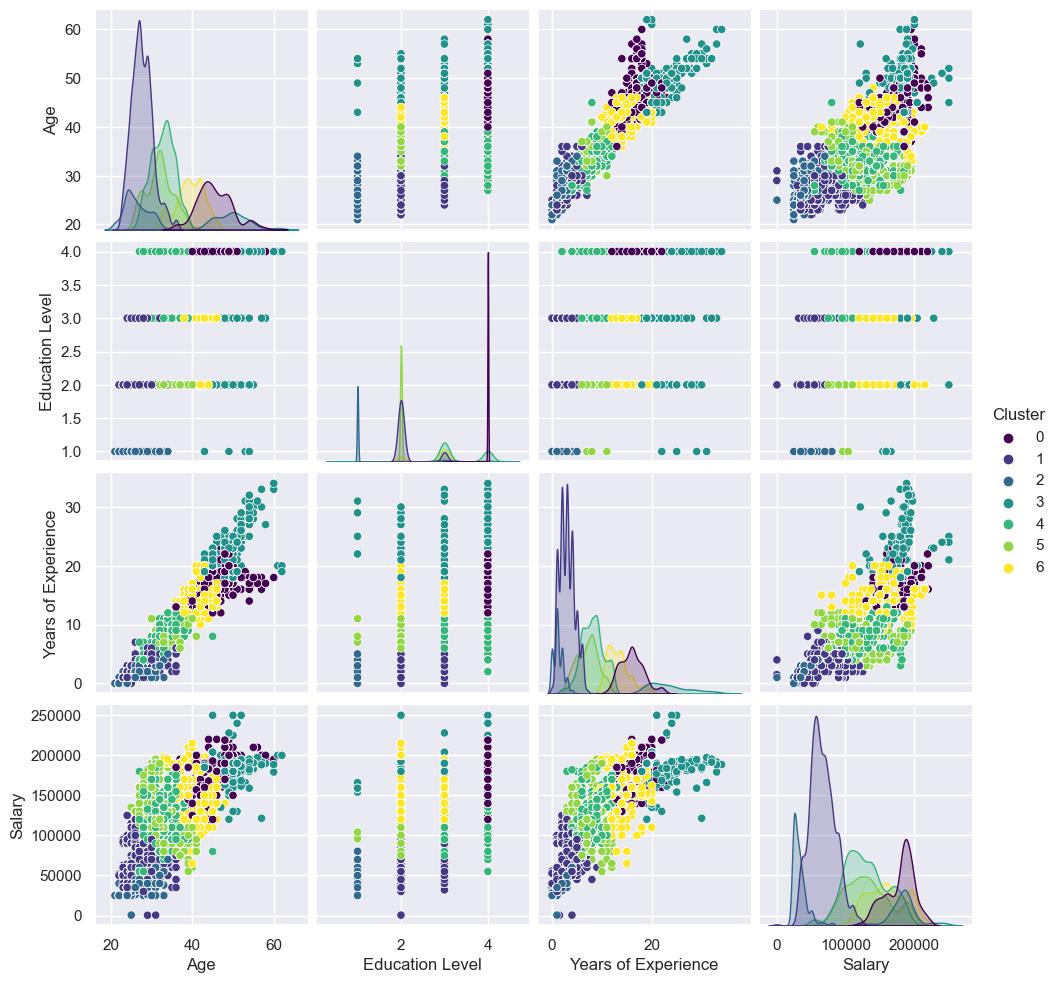

In [71]:
sns.pairplot(data=check_raw_data, hue='Cluster', palette='viridis');

In [72]:
check_pca = PCA(n_components=2)
check_pca_data = check_pca.fit_transform(stand_data[stand_data.columns[:-1]]);

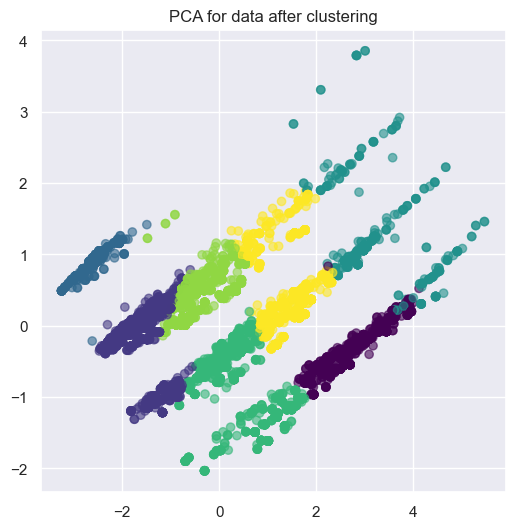

In [73]:
fig = plt.figure(figsize=(6, 6))
plt.title('PCA for data after clustering')
plt.scatter(check_pca_data.T[0], check_pca_data.T[1], c=check_raw_data['Cluster'], cmap=cmap, alpha=0.6)
plt.show();

## 3-dimensional data clustering

I decided to perform above analysis for 3-dimensional data including `Age`, `Years of Experience` and `Salary` features.

In [74]:
part_data

Age  Years of Experience    Salary
0     32.0                  5.0   90000.0
1     28.0                  3.0   65000.0
2     45.0                 15.0  150000.0
3     36.0                  7.0   60000.0
4     52.0                 20.0  200000.0
...    ...                  ...       ...
6699  49.0                 20.0  200000.0
6700  32.0                  3.0   50000.0
6701  30.0                  4.0   55000.0
6702  46.0                 14.0  140000.0
6703  26.0                  1.0   35000.0

[6680 rows x 3 columns]

In [75]:
part_data.describe()

Age  Years of Experience         Salary
count  6680.000000          6680.000000    6680.000000
mean     33.650299             8.112201  115422.008084
std       7.607778             6.056605   52778.626555
min      21.000000             0.000000     350.000000
25%      28.000000             3.000000   70000.000000
50%      32.000000             7.000000  115000.000000
75%      38.000000            12.000000  160000.000000
max      62.000000            34.000000  250000.000000

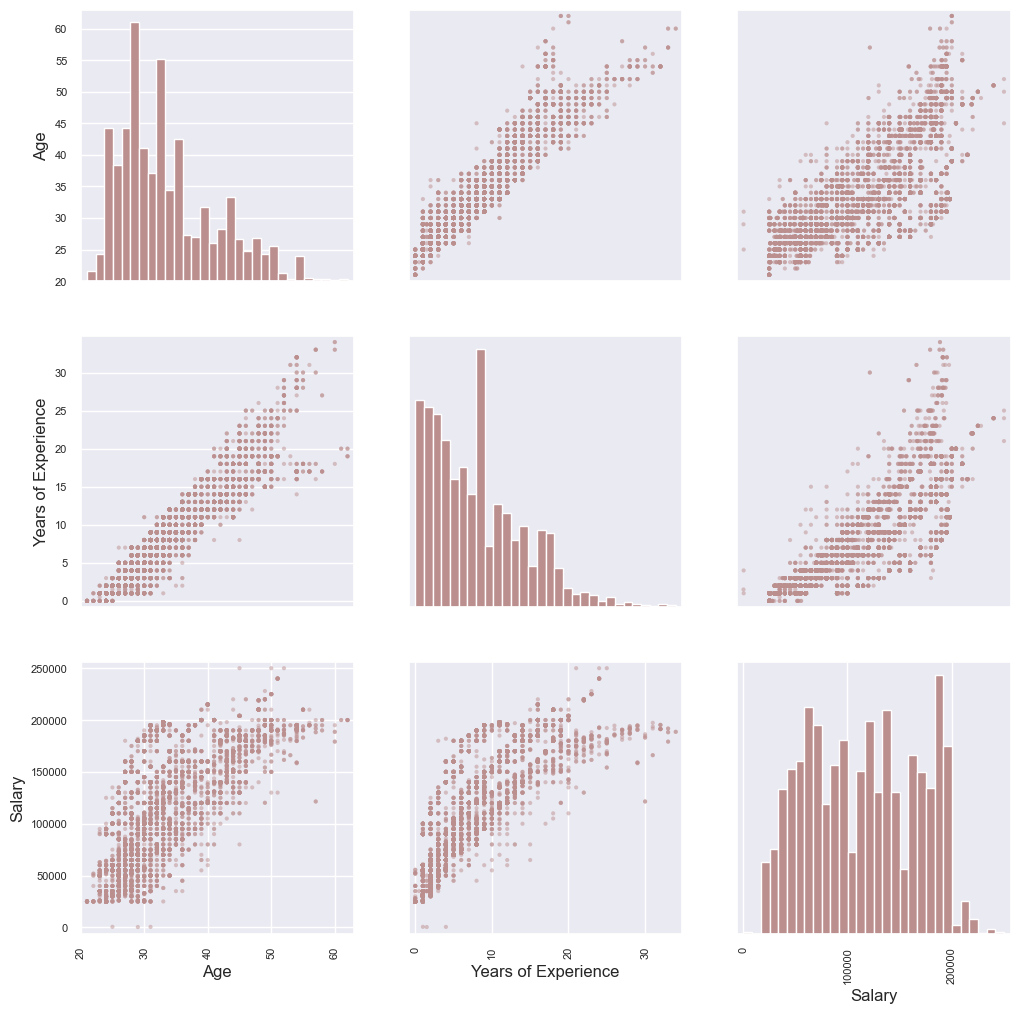

In [76]:
pd.plotting.scatter_matrix(part_data, figsize=(12, 12), color='rosybrown', hist_kwds={'bins':30, 'color':'rosybrown'});
plt.subplots_adjust(hspace=0.2, wspace=0.2);

In [77]:
%%time
part_scaler = StandardScaler()
part_stand_data = part_scaler.fit_transform(part_data)
part_stand_data = pd.DataFrame(data=part_stand_data, index=part_data.index, columns=part_data.columns)

CPU times: total: 15.6 ms
Wall time: 0 ns


In [78]:
part_stand_data

Age  Years of Experience    Salary
0    -0.216939            -0.513891 -0.481708
1    -0.742756            -0.844134 -0.955421
2     1.491966             1.137323  0.655200
3     0.308878            -0.183648 -1.050163
4     2.412146             1.962930  1.602625
...        ...                  ...       ...
6699  2.017784             1.962930  1.602625
6700 -0.216939            -0.844134 -1.239648
6701 -0.479847            -0.679012 -1.144905
6702  1.623421             0.972201  0.465716
6703 -1.005664            -1.174376 -1.523875

[6680 rows x 3 columns]

In [79]:
%%time
part_inertias = []
for ncl in range(2, 21):
    nkm = KMeans(n_clusters=ncl, init='random', n_init=1, max_iter=max_iter, random_state=42)
    nkm.fit(part_stand_data)
    part_inertias.append(nkm.inertia_)

CPU times: total: 3.19 s
Wall time: 559 ms


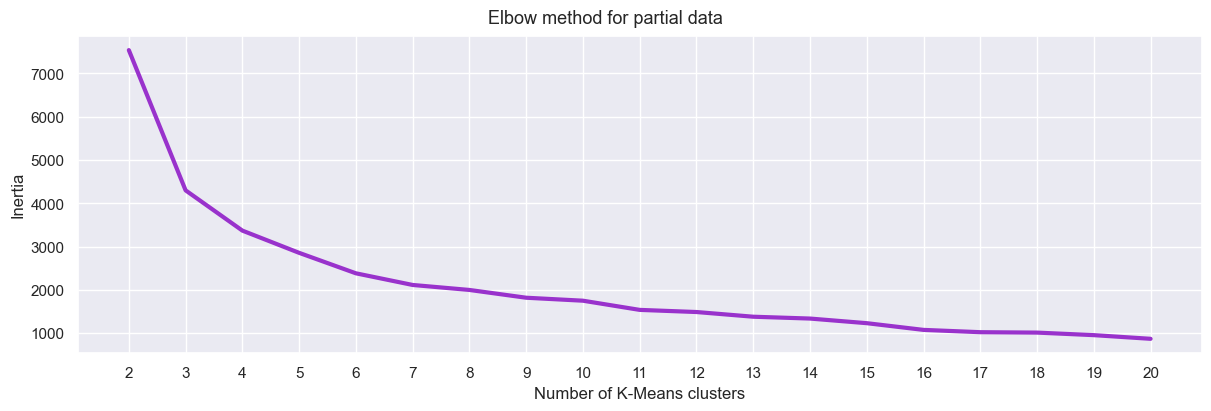

In [80]:
fig, ax = plt.subplots(figsize=(12, 4), constrained_layout=True)
fig.suptitle('Elbow method for partial data', fontsize=13)
xclusters = range(2, 21, 1)
ax.plot(xclusters, part_inertias, linewidth=3, color='darkorchid')
ax.set(xlabel='Number of K-Means clusters', ylabel='Inertia')
ax.set_xticks(np.arange(2, 21, 1.0))
ax.grid(True)

In [81]:
# default KMeans parameters
part_dinertias = []
for ncl in range(2, 21):
    nkm = KMeans(n_clusters=ncl, random_state=42)
    nkm.fit(stand_data)
    part_dinertias.append(nkm.inertia_)

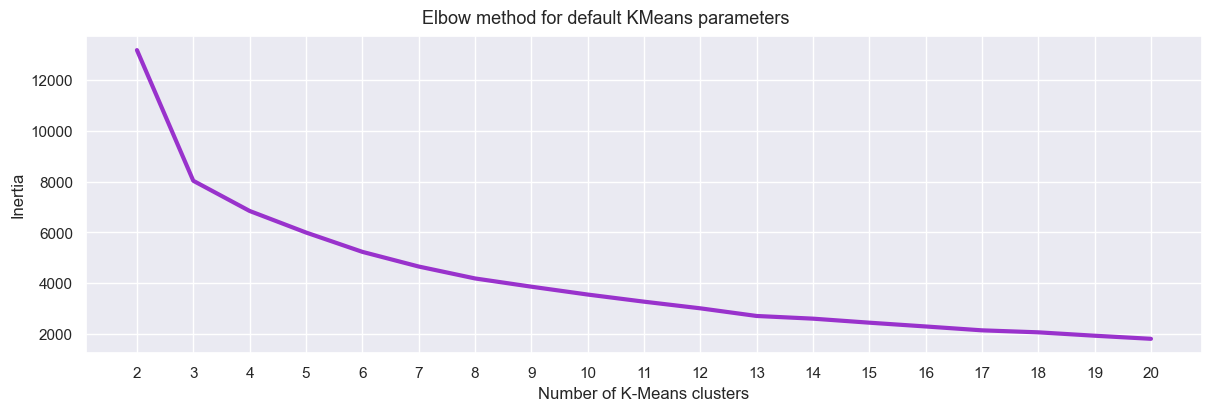

In [82]:
fig, ax = plt.subplots(figsize=(12, 4), constrained_layout=True)
fig.suptitle('Elbow method for default KMeans parameters', fontsize=13)
xclusters = range(2, 21, 1)
ax.plot(xclusters, part_dinertias, linewidth=3, color='darkorchid')
ax.set(xlabel='Number of K-Means clusters', ylabel='Inertia')
ax.set_xticks(np.arange(2, 21, 1.0))
ax.grid(True)

In [83]:
part_nclusters = 3

In [84]:
part_cmap = 'plasma'
part_colors = mcp.gen_color(cmap=part_cmap, n=part_nclusters)

In [85]:
%%time
part_kmeans = KMeans(n_clusters=part_nclusters, init='random', n_init=1, max_iter=max_iter, random_state=42)
part_kmeans.fit(part_stand_data)
part_cluster_labels = part_kmeans.labels_
part_centroids = part_kmeans.cluster_centers_

CPU times: total: 31.2 ms
Wall time: 26 ms


In [86]:
part_kmeans.inertia_

4299.909076791137

In [87]:
part_data = part_data.assign(Cluster=part_cluster_labels)
part_stand_data = part_stand_data.assign(Cluster=part_cluster_labels)

In [88]:
part_data

Age  Years of Experience    Salary  Cluster
0     32.0                  5.0   90000.0        2
1     28.0                  3.0   65000.0        2
2     45.0                 15.0  150000.0        0
3     36.0                  7.0   60000.0        2
4     52.0                 20.0  200000.0        0
...    ...                  ...       ...      ...
6699  49.0                 20.0  200000.0        0
6700  32.0                  3.0   50000.0        2
6701  30.0                  4.0   55000.0        2
6702  46.0                 14.0  140000.0        0
6703  26.0                  1.0   35000.0        2

[6680 rows x 4 columns]

In [89]:
part_labels = pd.Series(part_data['Cluster'])
part_data_clusters = [list(part_labels[part_labels==i].index) for i in range(part_nclusters)]

In [90]:
for i in range(part_nclusters):
    print('Cluster {}: size = {}'.format(i, len(part_data_clusters[i])))

Cluster 0: size = 1433
Cluster 1: size = 2438
Cluster 2: size = 2809


In [91]:
part_mean_data = pd.DataFrame(part_data.groupby(['Cluster']).mean())

In [92]:
part_mean_data

Age  Years of Experience         Salary
Cluster                                               
0        45.554780            17.319609  176969.501745
1        33.679245             8.707137  137935.760870
2        27.552154             2.898718   64483.564614

In [93]:
part_mean_stand_data = pd.DataFrame(part_stand_data.groupby(['Cluster']).mean())

In [94]:
part_mean_stand_data

Age  Years of Experience    Salary
Cluster                                         
0        1.564895             1.520340  1.166232
1        0.003805             0.098237  0.426601
2       -0.801627            -0.860857 -0.965206

In [95]:
part_centroids

array([[ 1.55969638,  1.51490649,  1.16121873],
       [-0.00559883,  0.08992419,  0.41284913],
       [-0.80779518, -0.86942913, -0.97238287]])

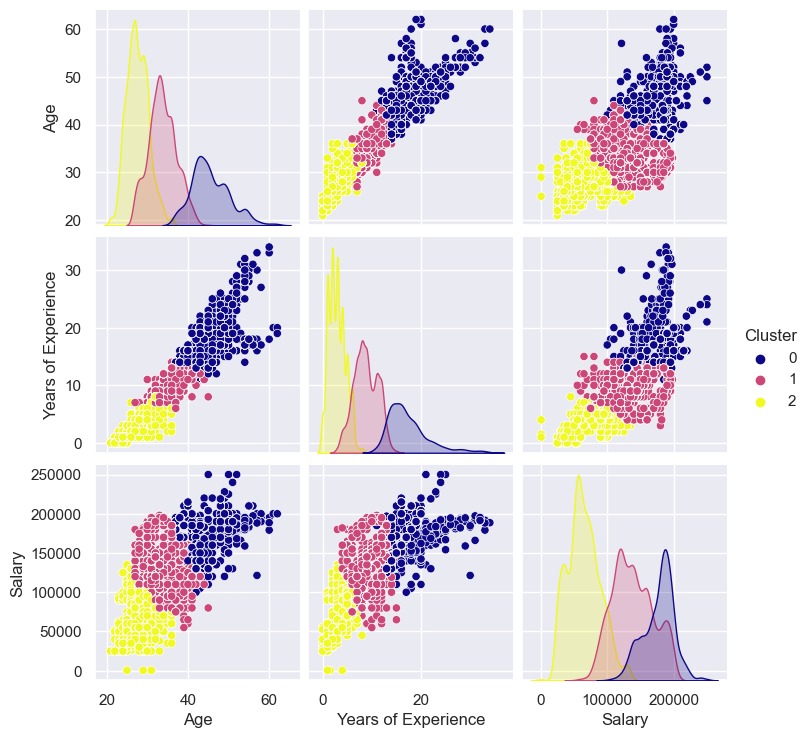

In [96]:
sns.pairplot(data=part_data, hue='Cluster', palette='plasma');

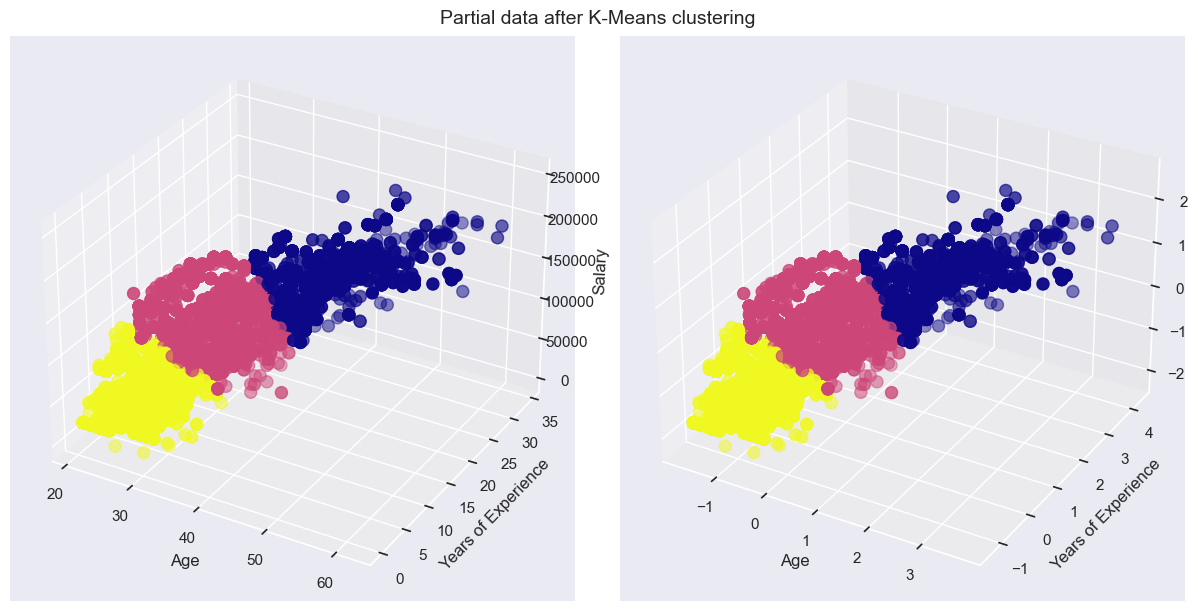

In [97]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6), subplot_kw=dict(projection='3d'), constrained_layout=True)
fig.suptitle('Partial data after K-Means clustering', fontsize=14)
axs[0].scatter(part_data['Age'], part_data['Years of Experience'], part_data['Salary'],
           s=75, c=part_data['Cluster'], cmap=part_cmap)

axs[1].scatter(part_stand_data['Age'], part_stand_data['Years of Experience'], part_stand_data['Salary'],
           s=75, c=part_data['Cluster'], cmap=part_cmap)

for i, ax in enumerate(axs.flat):
    ax.set(xlabel='Age', ylabel='Years of Experience', zlabel='Salary')
    ax.grid(True)

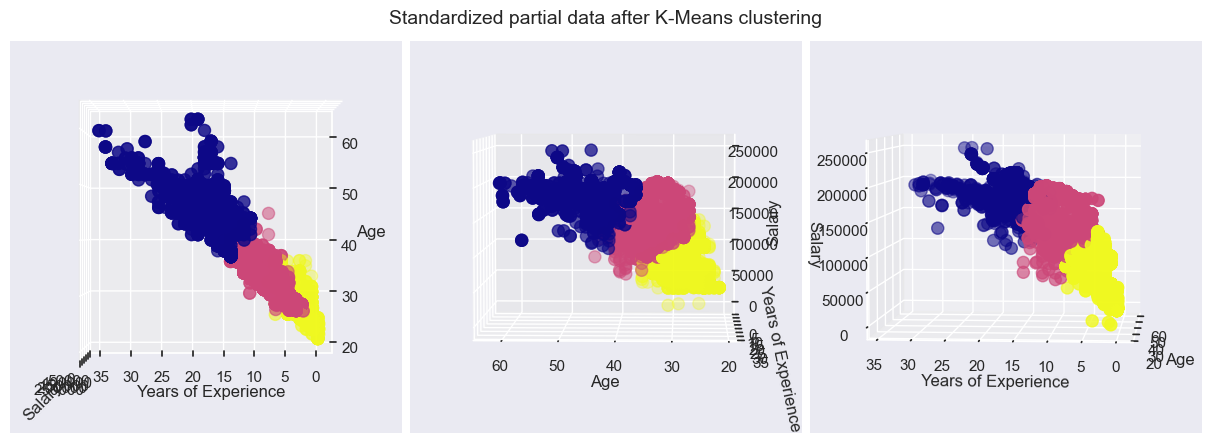

In [98]:
fig, axs = plt.subplots(1, 3, figsize=(12, 6), subplot_kw=dict(projection='3d'), constrained_layout=True)
fig.suptitle('Standardized partial data after K-Means clustering', fontsize=14, y=0.88)

axs[0].scatter(part_data['Age'], part_data['Years of Experience'], part_data['Salary'],
           s=75, c=part_data['Cluster'], cmap=part_cmap)
axs[0].view_init(90, 179)

axs[1].scatter(part_data['Age'], part_data['Years of Experience'], part_data['Salary'],
           s=75, c=part_data['Cluster'], cmap=part_cmap)
axs[1].view_init(4, 92)

axs[2].scatter(part_data['Age'], part_data['Years of Experience'], part_data['Salary'],
           s=75, c=part_data['Cluster'], cmap=part_cmap)
axs[2].view_init(4, -175)

for i, ax in enumerate(axs.flat):
    ax.set(xlabel='Age', ylabel='Years of Experience', zlabel='Salary')
    ax.grid(True)

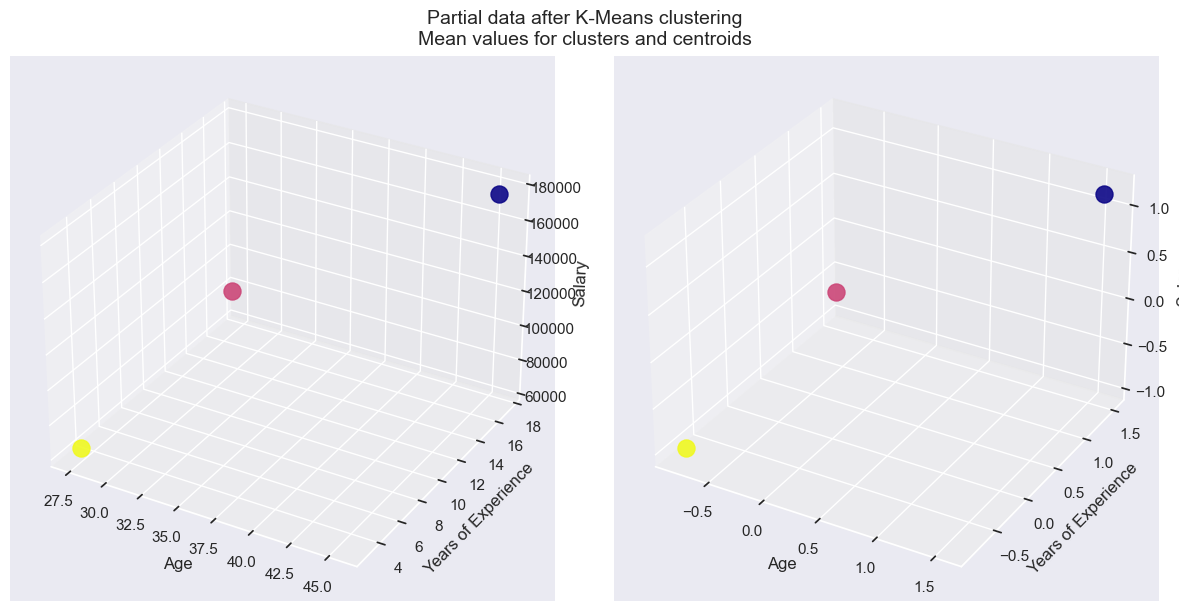

In [99]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6), subplot_kw=dict(projection='3d'), constrained_layout=True)
fig.suptitle('Partial data after K-Means clustering\nMean values for clusters and centroids', fontsize=14)
for c in range(part_nclusters):
    axs[0].scatter(part_mean_data['Age'][c],
                   part_mean_data['Years of Experience'][c],
                   part_mean_data['Salary'][c],
                   s=150, label=c, color=part_colors[c], alpha=0.9)
for c in range(part_nclusters):
    axs[1].scatter(part_centroids[c][0],
                   part_centroids[c][1],
                   part_centroids[c][2],
                   s=150, label=c, color=part_colors[c], alpha=0.9)
for i, ax in enumerate(axs.flat):
    ax.set(xlabel='Age', ylabel='Years of Experience', zlabel='Salary')
    ax.grid(True)

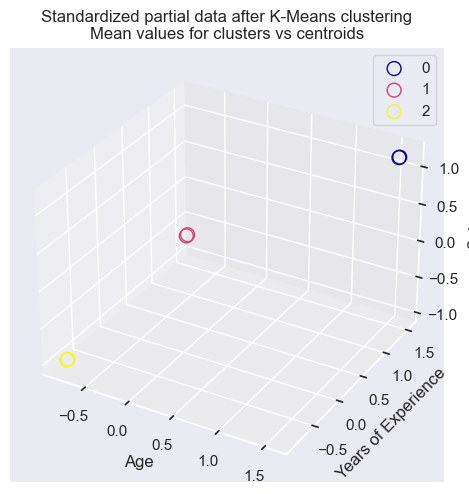

In [100]:
fig = plt.figure(constrained_layout=True)
ax = fig.add_subplot(projection='3d')
for c in range(part_nclusters):
    ax.scatter(part_centroids[c][0],
               part_centroids[c][1],
               part_centroids[c][2],
               s=100, label=c, edgecolors=part_colors[c], facecolors='none')
for c in range(part_nclusters):
    ax.scatter(part_mean_stand_data['Age'][c],
               part_mean_stand_data['Years of Experience'][c],
               part_mean_stand_data['Salary'][c],
               s=100, edgecolors=part_colors[c], facecolors='none')
ax.set(xlabel='Age', ylabel='Years of Experience', zlabel='Salary')
plt.title('Standardized partial data after K-Means clustering\nMean values for clusters vs centroids', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

In [101]:
%%time
part_pca = PCA(n_components=2)
part_pca_data = part_pca.fit_transform(part_stand_data[part_stand_data.columns[:-1]]);

CPU times: total: 31.2 ms
Wall time: 4.29 ms


In [102]:
part_pca.components_

array([[ 0.58210835,  0.59918641,  0.54965945],
       [ 0.52365558,  0.24088942, -0.81716407]])

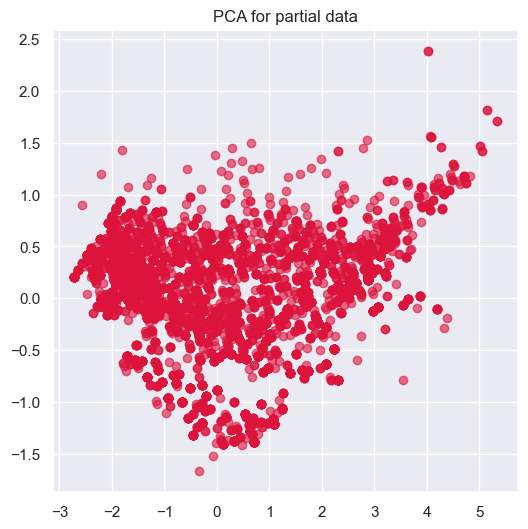

In [103]:
fig = plt.figure(figsize=(6, 6))
plt.title('PCA for partial data')
plt.scatter(part_pca_data.T[0], part_pca_data.T[1], c='crimson', alpha=0.6)
plt.show();

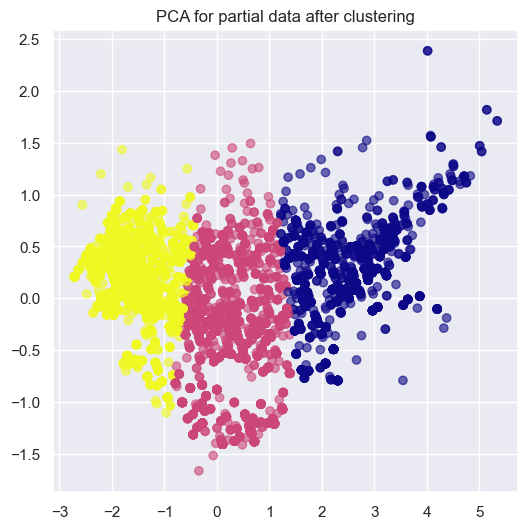

In [104]:
fig = plt.figure(figsize=(6, 6))
plt.title('PCA for partial data after clustering')
plt.scatter(part_pca_data.T[0], part_pca_data.T[1], c=part_data['Cluster'], cmap=part_cmap, alpha=0.6)
plt.show();

# Algorithms written *from scratch*

The term *from scratch* can have several interpretations - we can write algorithms using some ready `numpy` functions, or we can implement our own functions from scratch...

Results obtained from implemented below algorithms (classes: `MyStandardScaler`, `MyKMeans` and `MyPCA`) are comparable with results from scikit-learn algorithms.

In [105]:
my_raw_data

Age Education Level  Years of Experience    Salary
0     32.0               2                  5.0   90000.0
1     28.0               3                  3.0   65000.0
2     45.0               4                 15.0  150000.0
3     36.0               2                  7.0   60000.0
4     52.0               3                 20.0  200000.0
...    ...             ...                  ...       ...
6699  49.0               4                 20.0  200000.0
6700  32.0               1                  3.0   50000.0
6701  30.0               2                  4.0   55000.0
6702  46.0               3                 14.0  140000.0
6703  26.0               1                  1.0   35000.0

[6680 rows x 4 columns]

### `class MyStandardScaler`

Results from version 1 of `MyStandardScaler`are the same as from scikit-learn `StandardScaler`, results from ver. 2 are the same as from ver. 3, slightly different (difference: 10e-12) from scikit-learn and ver. 1.

Wall time for scikit-learn `StandardScaler`: ~ 10e1 ms, for ver. 1: ~ 0 ns, 10e0 ms, ver. 2: ~ 10e2 ms and ver. 3: ~ 10e1 s = 10e4 ms.

In [106]:
class MyStandardScaler:
    
    # version 1
    def __init__(self, mean=0, var=1):
        self.mean = mean
        self.var = var
        self.std = var
        
    def fit_transform(self, data):
        self.mean = np.mean(data, axis=0)
        self.var = np.var(data, axis=0)
        self.std = np.std(data, axis=0)
        stand_data = (data-self.mean) / self.std
        return stand_data
    
    # version 2
    '''def __init__(self, mean=0, var=1):
        self.mean = mean
        self.var = var
        self.std = np.sqrt(var)
        
    @staticmethod    
    def calculate_mean(data):
        return np.sum(data, axis=0) / len(data)
    
    @staticmethod
    def calculate_var(data):
        return np.sum(np.square((i-MyStandardScaler.calculate_mean(data))) for i in data) / len(data)
        #return np.sum(np.power((i-MyStandardScaler.calculate_mean(data)), 2) for i in data) / len(data)
    
    def fit_transform(self, data):
        self.mean = MyStandardScaler.calculate_mean(data)
        self.var = MyStandardScaler.calculate_var(data)
        self.std = np.sqrt(self.var)
        stand_data = (data-self.mean) / self.std
        return stand_data'''   
    
    # version 3
    '''def __init__(self, mean=0, var=1):
        self.mean = mean
        self.var = var
        self.std = var ** 0.5
        
    @staticmethod    
    def calculate_mean(data):
        return sum(data) / len(data)
    
    @staticmethod
    def calculate_var(data):
        return sum((i-MyStandardScaler.calculate_mean(data))**2 for i in data) / len(data)
    
    def fit_transform(self, data):
        self.mean = MyStandardScaler.calculate_mean(data)
        self.var = MyStandardScaler.calculate_var(data)
        self.std = self.var ** 0.5
        stand_data = (data-self.mean) / self.std
        return stand_data'''

In [107]:
%%time
my_scaler = MyStandardScaler()
my_stand_data = my_scaler.fit_transform(my_raw_data.to_numpy(dtype='float64'))
my_stand_data = pd.DataFrame(data=my_stand_data, index=my_raw_data.index, columns=my_raw_data.columns)

CPU times: total: 0 ns
Wall time: 0 ns


In [108]:
my_stand_data

Age  Education Level  Years of Experience    Salary
0    -0.216939        -0.699490            -0.513891 -0.481708
1    -0.742756         0.436289            -0.844134 -0.955421
2     1.491966         1.572068             1.137323  0.655200
3     0.308878        -0.699490            -0.183648 -1.050163
4     2.412146         0.436289             1.962930  1.602625
...        ...              ...                  ...       ...
6699  2.017784         1.572068             1.962930  1.602625
6700 -0.216939        -1.835269            -0.844134 -1.239648
6701 -0.479847        -0.699490            -0.679012 -1.144905
6702  1.623421         0.436289             0.972201  0.465716
6703 -1.005664        -1.835269            -1.174376 -1.523875

[6680 rows x 4 columns]

Difference of mean and variance of the `raw_data` dataset between `StandardScaler` and `MyStandardScaler` results:

In [109]:
my_scaler.mean

array([3.36502994e+01, 2.61586826e+00, 8.11220060e+00, 1.15422008e+05])

In [110]:
abs(scaler.mean_-my_scaler.mean)

array([0., 0., 0., 0.])

In [111]:
my_scaler.var

array([5.78696257e+01, 7.75197300e-01, 3.66769694e+01, 2.78516642e+09])

In [112]:
abs(scaler.var_-my_scaler.var)

array([0., 0., 0., 0.])

In [113]:
my_stand_data.describe()

Age  Education Level  Years of Experience        Salary
count  6.680000e+03     6.680000e+03         6.680000e+03  6.680000e+03
mean  -3.063418e-16     2.552848e-17        -1.021139e-16  3.403798e-17
std    1.000075e+00     1.000075e+00         1.000075e+00  1.000075e+00
min   -1.662936e+00    -1.835269e+00        -1.339498e+00 -2.180440e+00
25%   -7.427559e-01    -6.994903e-01        -8.441336e-01 -8.606781e-01
50%   -2.169389e-01    -6.994903e-01        -1.836481e-01 -7.996413e-03
75%    5.717867e-01     4.362888e-01         6.419588e-01  8.446853e-01
max    3.726689e+00     1.572068e+00         4.274629e+00  2.550049e+00

### `class MyKMeans`

Results from version 1 of `MyKMeans`are the same as from version 2. Behaviour comparable to scikit-learn `KMeans`.

Wall time for scikit-learn `KMeans`: ~ 10e1 ms, for ver. 1: ~ 10e0 s = 10e3 ms, ver. 2: ~ 10e0 s = 10e3 ms.

In [114]:
class MyKMeans:
    
    # version 1
    def __init__(self, n_clusters=8, max_iter=10, random_state=42, tol=1e-4):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = np.random.RandomState(random_state)
        self.tol = tol
        self.inertia = 0.0    
        self.cluster_centers = None
        
    def fit(self, data):
        # times algorithm runs with differen centroid seeds: n_init = 1
        self.cluster_centers = self.random_state.uniform(np.amin(data, axis=0), np.amax(data, axis=0),
                                                         size=(self.n_clusters, data.shape[1]))        
        for _ in range(self.max_iter):
            self.inertia = 0.0
            # cluster labels
            cluster_labels = []
            for data_point in data:
                # euclidean distance - assign each point to the nearest center
                distances = np.linalg.norm(data_point-self.cluster_centers, axis=1)
                # inertia
                self.inertia += np.min(np.square(np.linalg.norm(data_point-self.cluster_centers, axis=1)))
                #self.inertia += np.min(np.power(np.linalg.norm(data_point-self.cluster_centers, axis=1), 2))
                # index of a smallest value (index of the best centroid)
                cluster_num = np.argmin(distances)
                cluster_labels.append(cluster_num)
            cluster_labels = np.array(cluster_labels)
            
            # indices that belong to the cluster
            cluster_indices = []
            for i in range(self.n_clusters):
                cluster_indices.append(np.argwhere(cluster_labels==i))
            
            # reposition centroids
            centroids = []
            for i, indices in enumerate(cluster_indices):
                # if empty clusters (too high k)
                if len(indices) == 0:
                    centroids.append(self.cluster_centers[i])
                else:
                    # new cluster position
                    centroids.append(np.mean(data[indices], axis=0)[0])
            if np.max(self.cluster_centers-np.array(centroids)) < self.tol:
                break
            else:
                self.cluster_centers = np.array(centroids)
            
        return cluster_labels            
    
    # version 2
    '''def __init__(self, n_clusters=8, max_iter=10, random_state=42, tol=1e-4):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = np.random.RandomState(random_state)
        self.tol = tol
        self.inertia = 0.0    
        self.cluster_centers = None
        
    @staticmethod
    def mean(data):
        return np.sum(data, axis=0) / len(data)
        
    @staticmethod
    def euclidean_distance(data_point, cluster_centers):
        # for single data point and all centroids
        return (np.sum((cluster_centers-data_point)**2, axis=1)) ** 0.5
    
    @staticmethod
    def calculate_inertia(data_point, cluster_centers):
        return np.min(np.sum((cluster_centers-data_point)**2, axis=1))
        
    def fit(self, data):
        # times algorithm runs with differen centroid seeds: n_init = 1
        self.cluster_centers = self.random_state.uniform(np.amin(data, axis=0), np.amax(data, axis=0),
                                                         size=(self.n_clusters, data.shape[1]))        
        for _ in range(self.max_iter):
            self.inertia = 0.0
            # cluster labels
            cluster_labels = []
            for data_point in data:
                # euclidean distance - assign each point to the nearest center
                distances = MyKMeans.euclidean_distance(data_point, self.cluster_centers)
                # inertia
                self.inertia += MyKMeans.calculate_inertia(data_point, self.cluster_centers) # DEFAULT
                # index of a smallest value (index of the best centroid)
                cluster_num = np.argmin(distances)
                cluster_labels.append(cluster_num)
            cluster_labels = np.array(cluster_labels)
            
            # indices that belong to the cluster
            cluster_indices = []
            for i in range(self.n_clusters):
                cluster_indices.append(np.argwhere(cluster_labels==i))
            
            # reposition centroids
            centroids = []
            for i, indices in enumerate(cluster_indices):
                # if empty clusters (too high k)
                if len(indices) == 0:
                    centroids.append(self.cluster_centers[i])
                else:
                    # new cluster position
                    centroids.append(MyKMeans.mean(data[indices])[0])
            if np.max(self.cluster_centers-np.array(centroids)) < self.tol:
                break
            else:
                self.cluster_centers = np.array(centroids)
            
        return cluster_labels'''

In [115]:
%%time
my_inertias = []
for ncl in range(2, 21):
    nkm = MyKMeans(n_clusters=ncl, max_iter=max_iter, random_state=42)
    nkm.fit(my_stand_data.to_numpy(dtype='float64'))
    my_inertias.append(nkm.inertia)

CPU times: total: 23.9 s
Wall time: 24 s


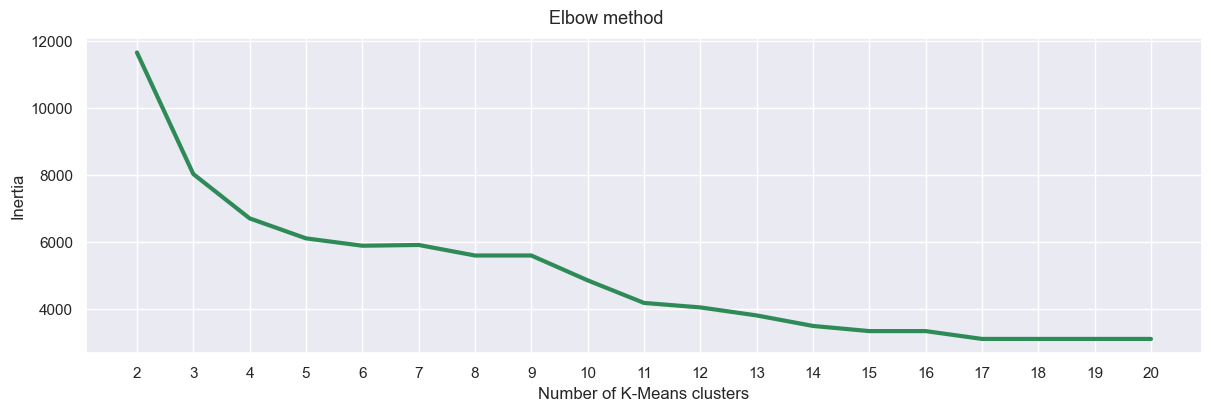

In [116]:
fig, ax = plt.subplots(figsize=(12, 4), constrained_layout=True)
fig.suptitle('Elbow method', fontsize=13)
xclusters = range(2, 21, 1)
ax.plot(xclusters, my_inertias, linewidth=3, color='seagreen')
ax.set(xlabel='Number of K-Means clusters', ylabel='Inertia')
ax.set_xticks(np.arange(2, 21, 1.0))
ax.grid(True)

In [117]:
my_nclusters = 3

In [118]:
my_cmap = 'viridis'
my_colors = mcp.gen_color(cmap=my_cmap, n=my_nclusters)

In [119]:
%%time
my_kmeans = MyKMeans(n_clusters=my_nclusters, max_iter=max_iter, random_state=42)
my_cluster_labels = my_kmeans.fit(my_stand_data.to_numpy(dtype='float64'))
my_centroids = my_kmeans.cluster_centers

CPU times: total: 1.3 s
Wall time: 1.27 s


In [120]:
my_kmeans.inertia

8035.615282986583

In [121]:
my_raw_data = my_raw_data.assign(Cluster=my_cluster_labels)
my_stand_data = my_stand_data.assign(Cluster=my_cluster_labels)

In [122]:
my_raw_data

Age Education Level  Years of Experience    Salary  Cluster
0     32.0               2                  5.0   90000.0        1
1     28.0               3                  3.0   65000.0        1
2     45.0               4                 15.0  150000.0        0
3     36.0               2                  7.0   60000.0        1
4     52.0               3                 20.0  200000.0        0
...    ...             ...                  ...       ...      ...
6699  49.0               4                 20.0  200000.0        0
6700  32.0               1                  3.0   50000.0        1
6701  30.0               2                  4.0   55000.0        1
6702  46.0               3                 14.0  140000.0        0
6703  26.0               1                  1.0   35000.0        1

[6680 rows x 5 columns]

In [123]:
my_labels = pd.Series(my_raw_data['Cluster'])
my_data_clusters = [list(my_labels[my_labels==i].index) for i in range(my_nclusters)]

In [124]:
for i in range(my_nclusters):
    print('Cluster {}: size = {}'.format(i, len(my_data_clusters[i])))

Cluster 0: size = 1400
Cluster 1: size = 2824
Cluster 2: size = 2456


In [125]:
print('\t\tKMeans\t\tMyKMeans')
for i in range(my_nclusters):
    print('Cluster {}:\t{}\t\t{}'.format(i, len(data_clusters[i]), len(my_data_clusters[i])))

		KMeans		MyKMeans
Cluster 0:	1561		1400
Cluster 1:	2460		2824
Cluster 2:	2659		2456


In [126]:
my_mean_data = pd.DataFrame(my_raw_data.groupby(['Cluster']).mean())

In [127]:
my_mean_data

Age Education Level  Years of Experience         Salary
Cluster                                                               
0        45.644286        3.503571            17.369286  177375.395714
1        27.662535        1.953612             2.983180   65376.978754
2        33.698290        2.871336             8.732899  137650.192182

Difference of mean values for clusters between `KMeans` and `MyKMeans` results in percents $\%$:

In [128]:
abs(my_mean_data-mean_data.to_numpy(dtype='float64')[[0, 2, 1]]) / mean_data.to_numpy(dtype='float64')[[0, 2, 1]] * 100

Age Education Level  Years of Experience    Salary
Cluster                                                         
0        1.795482        0.184558             2.741398  0.912269
1        0.521615        1.299806             5.307339  3.898687
2        1.569273        2.562587             5.999564  2.822348

In [129]:
my_mean_stand_data = pd.DataFrame(my_stand_data.groupby(['Cluster']).mean())

In [130]:
my_mean_stand_data

Age  Education Level  Years of Experience    Salary
Cluster                                                          
0        1.576661         1.008235             1.528543  1.173923
1       -0.787117        -0.752177            -0.846911 -0.948277
2        0.006309         0.290154             0.102491  0.421190

In [131]:
mean_stand_data

Age  Education Level  Years of Experience    Salary
Cluster                                                          
0        1.470829         1.000904             1.452016  1.143539
1       -0.062133         0.208671             0.020874  0.349597
2       -0.805986        -0.780648            -0.871737 -0.994762

In [132]:
my_centroids

array([[ 1.57666059,  1.00823471,  1.52854256,  1.17392265],
       [-0.78711708, -0.75217694, -0.84691092, -0.94827734],
       [ 0.00630856,  0.29015435,  0.10249057,  0.42119035]])

In [133]:
centroids[[0, 2, 1]]

array([[ 1.43479822,  1.01090103,  1.43094055,  1.13854915],
       [-0.80848305, -0.78190511, -0.87443077, -0.99796276],
       [-0.06735487,  0.18378953,  0.00703345,  0.33480365]])

Difference of centroids for clusters between `KMeans` and `MyKMeans` results:

In [134]:
abs(centroids[[0, 2, 1]]-my_centroids)

array([[0.14186237, 0.00266633, 0.09760201, 0.0353735 ],
       [0.02136597, 0.02972817, 0.02751985, 0.04968542],
       [0.07366343, 0.10636482, 0.09545713, 0.0863867 ]])

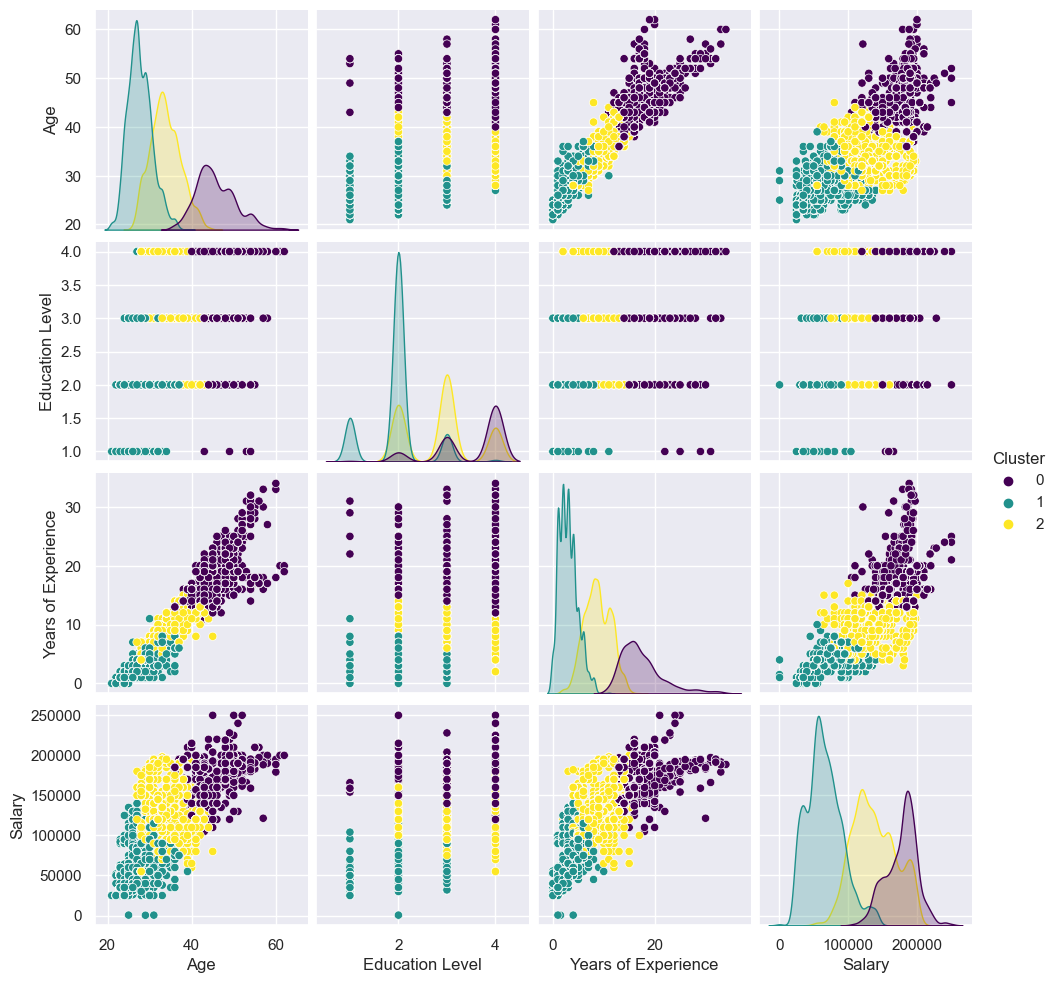

In [135]:
sns.pairplot(data=my_raw_data, hue='Cluster', palette='viridis');

### `class MyPCA`

Results from version 1 of `MyPCA`are the same as from version 2. Behaviour comparable to scikit-learn `PCA`, but needed to change sign of `self.components`.

Wall time for scikit-learn `PCA`: ~ 10e0 ms, for ver. 1: ~ 0 ns, 10e0 ms, ver. 2: ~ 10e0 ms.

In [136]:
class MyPCA:
    
    # version 1
    def __init__(self, n_components=2):
        self.n_components = n_components
        self.components = None
        
    def fit_transform(self, data):
        # covariance matrix of standardized data
        covariance_matrix = np.cov(data.T)
        # eigensystem of covariance matrix
        eigenvalues, eigenvectors  = np.linalg.eig(covariance_matrix)
        # sort the eigenvalues in descending order
        sorted_indices = np.argsort(eigenvalues)[::-1]
        sorted_eigenvalues = eigenvalues[sorted_indices]
        # similarly sort the eigenvectors
        sorted_eigenvectors = eigenvectors[:, sorted_indices]         
        # select principal components
        self.components = sorted_eigenvectors[:self.n_components] * (-1)
        # project data on the principal components
        data_projected = data.dot(self.components.T)
        return data_projected    
    
    # version 2
    '''def __init__(self, n_components=2):
        self.n_components = n_components
        self.components = None
        
    @staticmethod
    def is_upper_triangular(matrix, tol=1e-8):
        n = len(matrix)
        for i in range(n):
            for j in range(i):
                if np.abs(matrix[i][j]) > tol:
                    return False
        return True
        
    @staticmethod
    def norm(v):
        n = len(v)
        norm_sum = 0.0
        for i in range(n):
            norm_sum += v[i] * v[i]
        return norm_sum ** 0.5
        
    @staticmethod
    def qr_decomposition(matrix, standard=False):
        # Householder algorithm
        m, n = matrix.shape
        Q = np.eye(m)
        R = np.copy(matrix)
        if m == n:
            end = n-1
        else:
            end = n
        for i in range(end):
            H = np.eye(m)
            a = R[i:, i]
            norm_a = MyPCA.norm(a)
            if a[0] < 0:
                norm_a = -norm_a
            v = a / (a[0]+norm_a)
            v[0] = 1.0
            h = np.eye(len(a))
            h -= (2/np.dot(v, v)) * (v[:,None]@v[None,:])
            H[i:, i:] = h
            Q = Q @ H
            R = H @ R
        if standard:
            S = np.zeros((n, n))
            for i in range(n):
                if R[i][i] < 0:
                    S[i][i] = -1.0
                else:
                    S[i][i] = 1.0
            Q = Q @ S
            R = S @ R
        return Q, R
                 
    @staticmethod 
    def eig(matrix):
        n = len(matrix)
        cmatrix = np.copy(matrix)
        QQ = np.eye(n)
        max_iter = int(1e4)
        for i in range(max_iter):
            Q, R = MyPCA.qr_decomposition(cmatrix)
            QQ = QQ @ Q
            cmatrix = R @ Q           
            if MyPCA.is_upper_triangular(cmatrix, 1e-8):
                break
        eigenvalues = np.zeros(n, dtype=np.float64)
        for i in range(n):
            eigenvalues[i] = cmatrix[i][i]
        eigenvectors = np.copy(QQ)
        return (eigenvalues, eigenvectors)
        
    def fit_transform(self, data):
        # covariance matrix of standardized data
        covariance_matrix = (data.T@data) / (data.shape[0]-1)
        # eigensystem of covariance matrix
        eigenvalues, eigenvectors  = MyPCA.eig(covariance_matrix)
        # adjusting eigenvectors that are the largest in abs to be positive
        max_abs_idx = np.argmax(np.abs(eigenvectors), axis=0)
        signs = np.sign(eigenvectors[max_abs_idx, range(eigenvectors.shape[0])])
        eigenvectors = eigenvectors * signs[np.newaxis,:]
        # sort eigenvalues from smallest to gratest magnitude
        sorted_indices = np.argsort(eigenvalues)[::-1]
        sorted_eigenvalues = eigenvalues[sorted_indices]
        sorted_eigenvectors = eigenvectors[:, sorted_indices]
        # something wrong is here
        sorted_eigenvectors.T[0] *= (-1) 
        # principal components
        self.components = sorted_eigenvectors[:self.n_components] * (-1)
        # project data on the principal components
        data_projected = data.dot(self.components.T)
        return data_projected'''

In [137]:
%%time
my_pca = MyPCA(n_components=2)
my_pca_data = my_pca.fit_transform(my_stand_data[my_stand_data.columns[:-1]].to_numpy(dtype='float64'));

CPU times: total: 0 ns
Wall time: 0 ns


In [138]:
my_pca.components

array([[ 0.51843721,  0.38014824,  0.44290418,  0.62493685],
       [ 0.44120125, -0.85448914,  0.27147329, -0.03862671]])

In [139]:
pca.components_

array([[ 0.51843721,  0.44120125,  0.53308036,  0.50238397],
       [ 0.38014824, -0.85448914,  0.35361492, -0.01709148]])

Difference of principal components between `PCA` and `MyPCA` results:

In [140]:
abs(pca.components_-my_pca.components)

array([[8.88178420e-16, 6.10530104e-02, 9.01761786e-02, 1.22552882e-01],
       [6.10530104e-02, 3.33066907e-16, 8.21416284e-02, 2.15352387e-02]])

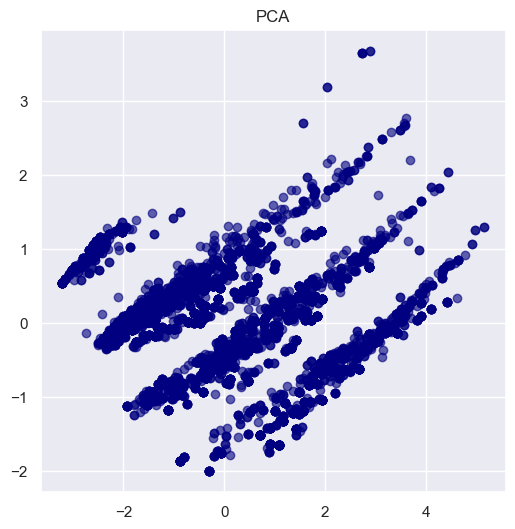

In [141]:
fig = plt.figure(figsize=(6, 6))
plt.title('PCA')
plt.scatter(my_pca_data.T[0], my_pca_data.T[1], c='navy', alpha=0.6)
plt.show();

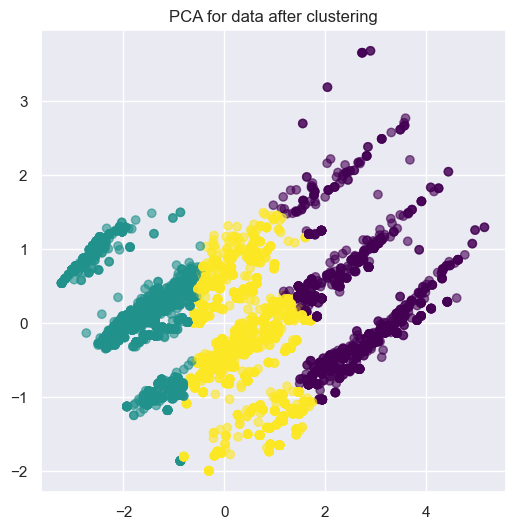

In [142]:
fig = plt.figure(figsize=(6, 6))
plt.title('PCA for data after clustering')
plt.scatter(my_pca_data.T[0], my_pca_data.T[1], c=my_raw_data['Cluster'], cmap=my_cmap, alpha=0.6)
plt.show();

In [143]:
my_part_data

Age  Years of Experience    Salary
0     32.0                  5.0   90000.0
1     28.0                  3.0   65000.0
2     45.0                 15.0  150000.0
3     36.0                  7.0   60000.0
4     52.0                 20.0  200000.0
...    ...                  ...       ...
6699  49.0                 20.0  200000.0
6700  32.0                  3.0   50000.0
6701  30.0                  4.0   55000.0
6702  46.0                 14.0  140000.0
6703  26.0                  1.0   35000.0

[6680 rows x 3 columns]

In [144]:
%%time
my_part_scaler = MyStandardScaler()
my_part_stand_data = my_part_scaler.fit_transform(my_part_data.to_numpy(dtype='float64'))
my_part_stand_data = pd.DataFrame(data=my_part_stand_data, index=my_part_data.index, columns=my_part_data.columns)

CPU times: total: 0 ns
Wall time: 0 ns


In [145]:
my_part_stand_data

Age  Years of Experience    Salary
0    -0.216939            -0.513891 -0.481708
1    -0.742756            -0.844134 -0.955421
2     1.491966             1.137323  0.655200
3     0.308878            -0.183648 -1.050163
4     2.412146             1.962930  1.602625
...        ...                  ...       ...
6699  2.017784             1.962930  1.602625
6700 -0.216939            -0.844134 -1.239648
6701 -0.479847            -0.679012 -1.144905
6702  1.623421             0.972201  0.465716
6703 -1.005664            -1.174376 -1.523875

[6680 rows x 3 columns]

In [146]:
%%time
my_part_inertias = []
for ncl in range(2, 21):
    nkm = MyKMeans(n_clusters=ncl, max_iter=max_iter, random_state=42)
    nkm.fit(my_part_stand_data.to_numpy(dtype='float64'))
    my_part_inertias.append(nkm.inertia)

CPU times: total: 23.2 s
Wall time: 24.1 s


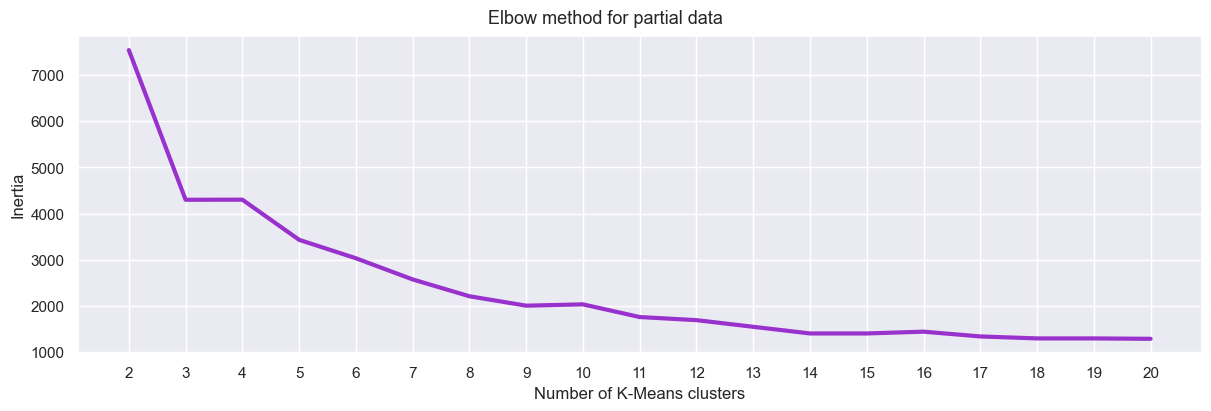

In [147]:
fig, ax = plt.subplots(figsize=(12, 4), constrained_layout=True)
fig.suptitle('Elbow method for partial data', fontsize=13)
xclusters = range(2, 21, 1)
ax.plot(xclusters, my_part_inertias, linewidth=3, color='darkorchid')
ax.set(xlabel='Number of K-Means clusters', ylabel='Inertia')
ax.set_xticks(np.arange(2, 21, 1.0))
ax.grid(True)

In [148]:
my_part_nclusters = 3

In [149]:
my_part_cmap = 'plasma'
my_part_colors = mcp.gen_color(cmap=my_part_cmap, n=my_part_nclusters)

In [150]:
%%time
my_part_kmeans = MyKMeans(n_clusters=my_part_nclusters, max_iter=max_iter, random_state=42)
my_part_cluster_labels = my_part_kmeans.fit(my_part_stand_data.to_numpy(dtype='float64'))
my_part_centroids = my_part_kmeans.cluster_centers

CPU times: total: 1.2 s
Wall time: 1.27 s


In [151]:
my_part_kmeans.inertia

4298.699988286657

In [152]:
my_part_data = my_part_data.assign(Cluster=my_part_cluster_labels)
my_part_stand_data = my_part_stand_data.assign(Cluster=my_part_cluster_labels)

In [153]:
my_part_data

Age  Years of Experience    Salary  Cluster
0     32.0                  5.0   90000.0        1
1     28.0                  3.0   65000.0        1
2     45.0                 15.0  150000.0        0
3     36.0                  7.0   60000.0        1
4     52.0                 20.0  200000.0        0
...    ...                  ...       ...      ...
6699  49.0                 20.0  200000.0        0
6700  32.0                  3.0   50000.0        1
6701  30.0                  4.0   55000.0        1
6702  46.0                 14.0  140000.0        0
6703  26.0                  1.0   35000.0        1

[6680 rows x 4 columns]

In [154]:
my_part_labels = pd.Series(my_part_data['Cluster'])
my_part_data_clusters = [list(my_part_labels[my_part_labels==i].index) for i in range(my_part_nclusters)]

In [155]:
for i in range(my_part_nclusters):
    print('Cluster {}: size = {}'.format(i, len(my_part_data_clusters[i])))

Cluster 0: size = 1390
Cluster 1: size = 2859
Cluster 2: size = 2431


In [156]:
print('\t\tKMeans\t\tMyKMeans')
for i in range(my_part_nclusters):
    print('Cluster {}:\t{}\t\t{}'.format(i, len(part_data_clusters[i]), len(my_part_data_clusters[i])))

		KMeans		MyKMeans
Cluster 0:	1433		1390
Cluster 1:	2438		2859
Cluster 2:	2809		2431


In [157]:
my_part_mean_data = pd.DataFrame(my_part_data.groupby(['Cluster']).mean())

In [158]:
my_part_mean_data

Age  Years of Experience         Salary
Cluster                                               
0        45.743165            17.436691  177693.707194
1        27.618398             2.945261   65117.521861
2        33.829700             8.857260  138977.279309

Difference of mean values for clusters between `KMeans` and `MyKMeans` results in percents $\%$:

In [159]:
abs(my_part_mean_data-part_mean_data.to_numpy(dtype='float64')[[0, 2, 1]]) / part_mean_data.to_numpy(dtype='float64')[[0, 2, 1]] \
* 100

Age  Years of Experience    Salary
Cluster                                         
0        0.413536             0.676005  0.409226
1        0.240432             1.605612  0.983130
2        0.446727             1.724142  0.755075

In [160]:
my_part_mean_stand_data = pd.DataFrame(my_part_stand_data.groupby(['Cluster']).mean())

In [161]:
my_part_mean_stand_data

Age  Years of Experience    Salary
Cluster                                         
0        1.589659             1.539673  1.179954
1       -0.792919            -0.853172 -0.953194
2        0.023583             0.123025  0.446337

In [162]:
my_part_centroids

array([[ 1.58965876,  1.53967255,  1.17995417],
       [-0.79291913, -0.85317221, -0.95319365],
       [ 0.02358294,  0.12302529,  0.44633663]])

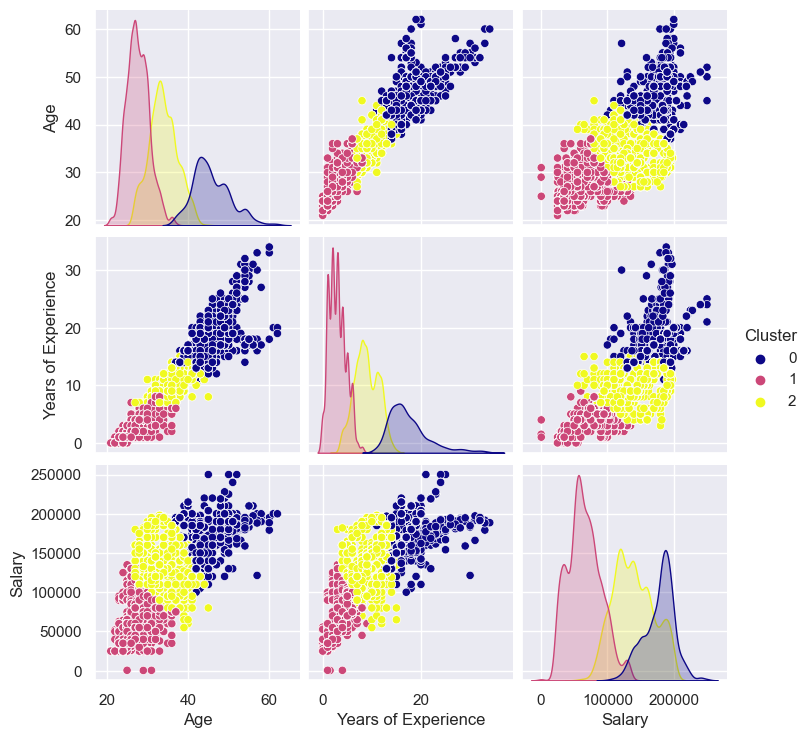

In [163]:
sns.pairplot(data=my_part_data, hue='Cluster', palette='plasma');

In [164]:
%%time
my_part_pca = MyPCA(n_components=2)
my_part_pca_data = my_part_pca.fit_transform(my_part_stand_data[my_part_stand_data.columns[:-1]].to_numpy(dtype='float64'));

CPU times: total: 15.6 ms
Wall time: 0 ns


In [165]:
my_part_pca.components

array([[ 0.58210835,  0.52365558,  0.62204076],
       [ 0.59918641,  0.24088942, -0.76351027]])

In [166]:
part_pca.components_

array([[ 0.58210835,  0.59918641,  0.54965945],
       [ 0.52365558,  0.24088942, -0.81716407]])

Difference of principal components between `PCA` and `MyPCA` results:

In [167]:
abs(part_pca.components_-my_part_pca.components)

array([[3.33066907e-16, 7.55308307e-02, 7.23813034e-02],
       [7.55308307e-02, 1.66533454e-15, 5.36538020e-02]])

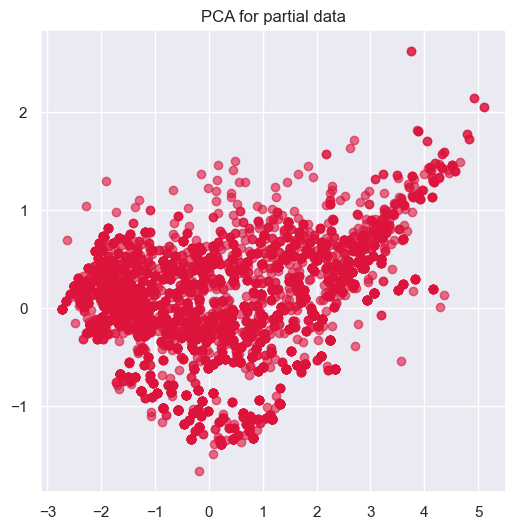

In [168]:
fig = plt.figure(figsize=(6, 6))
plt.title('PCA for partial data')
plt.scatter(my_part_pca_data.T[0], my_part_pca_data.T[1], c='crimson', alpha=0.6)
plt.show();

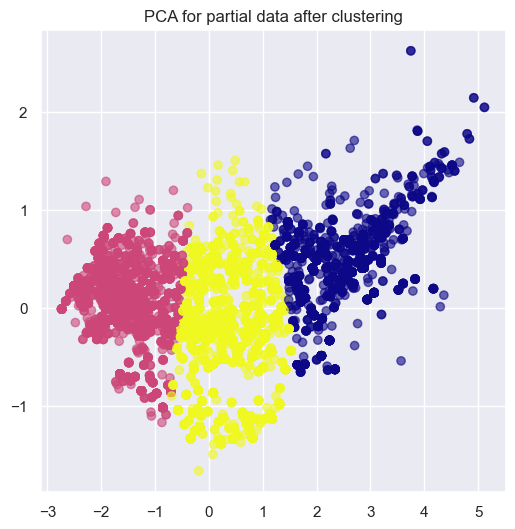

In [169]:
fig = plt.figure(figsize=(6, 6))
plt.title('PCA for partial data after clustering')
plt.scatter(my_part_pca_data.T[0], my_part_pca_data.T[1], c=my_part_data['Cluster'], cmap=my_part_cmap, alpha=0.6)
plt.show();

# The Bibliography

## Theory

* [What is Machine Learning?, *techtarget.com*](https://www.techtarget.com/searchenterpriseai/definition/machine-learning-ML)
* [KMeans, *scikit-learn.org*](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans)
* [PCA, *scikit-learn.org*](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)
* [What is Principal Component Analysis?, *ibm.com*](https://www.ibm.com/topics/principal-component-analysis)
* [Salary Data, *kaggle.com*](https://www.kaggle.com/datasets/mohithsairamreddy/salary-data)
* [Normalization vs. Standardization, *datacamp.com*](https://www.datacamp.com/tutorial/normalization-vs-standardization)
* [StandardScaler, *scikit-learn.org*](https://scikit-learn.org/dev/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)
* [Cluster analysis, *en.wikipedia.org*](https://en.wikipedia.org/wiki/Cluster_analysis)
* [Elbow method (clustering), *en.wikipedia.org*](https://en.wikipedia.org/wiki/Elbow_method_(clustering))
* [Special feature: dimension reduction and cluster analysis, *link.springer.com*](https://link.springer.com/article/10.1007/s41237-019-00092-6)
* [Przekleństwo wymiarowości i techniki redukcji wymiarów, *miroslawmamczur.pl*](https://miroslawmamczur.pl/przeklenstwo-wielowymiarowosci-i-jakie-sa-techniki-redukcji-wymiarow/)
* [Detailed Explanation of QR Decomposition by Householder Transformation, *medium.com*](https://kwokanthony.medium.com/detailed-explanation-with-example-on-qr-decomposition-by-householder-transformation-5e964d7f7656)
* [How K-Means Clustering is transforming the Banking Sector, *datrics.ai*](https://www.datrics.ai/articles/how-k-means-clustering-is-transforming-the-banking-sector)
* [Unsupervised Learning: Stock Market Clustering with K-Means, *blog.mlq.ai*](https://blog.mlq.ai/stock-market-clustering-with-k-means/amp/)
* [Stock classification using K-Means clustering, *medium.com*](https://medium.com/@facujallia/stock-classification-using-k-means-clustering-8441f75363de)

## Codes

* [K-Means Clustering form Scratch in Python (Mathematical), *youtube.com$/$@NeuralNine*](https://www.youtube.com/watch?v=5w5iUbTlpMQ)
* [Implementing K-Means Clustering from Scratch in Python, *medium.com*](https://medium.com/@avijit.bhattacharjee1996/implementing-k-means-clustering-from-scratch-in-python-a277c23563ac)
* [How to scale Machine Learning Data From Scratch With Python, *machinelearningmystery.com*](https://machinelearningmastery.com/scale-machine-learning-data-scratch-python/)
* [Principal Component Analysis (PCA) from Scratch, *bagheri365.github.io*](https://bagheri365.github.io/blog/Principal-Component-Analysis-from-Scratch/)
* [Build a Principal Component Analysis (PCA) Algorithm from Scratch, *medium.com*](https://medium.com/technological-singularity/build-a-principal-component-analysis-pca-algorithm-from-scratch-7515595bf08b)
* [Eigenvalues and Eigenvectors From Scratch Using Python, *jamesmccaffrey.wordpress.com*](https://jamesmccaffrey.wordpress.com/2023/12/22/eigenvalues-and-eigenvectors-from-scratch-using-python/)